# Capítulo 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Funciones útiles

Antes de comenzar con los ejercicios, se presentan dos funciones que son muy convenientes para su resolución, especialmente por la forma en que los autores presentan los datos (recordemos que es un texto de la década de 1990, por lo que no estaba adaptado al uso masivo de programas estadísticos y mucho menos a los lenguajes de programación). 

Además, las funciones desarrolladas permiten conocer un aspecto de Python: la lógica de la programación y la posibilidad de ser autores de nuestras propias funciones.

In [3]:
# Función para contar el número de decimales
def contar_decimales(num: int|float) -> int:
    """
    Cuenta los decimales de un número. Devuelve un número entero que es la 
    cantidad de decimales del argumento.
    """
    
    # Todos los números, ya sean float o int, se convierten a float.
    num2 = float(num)
    if num2.is_integer():  # Una vez asegurada la condición float, se puede aplicar el método 'is_interger()'.
        num2 = int(num2) # De esta manera, si es entero se borra el decimal '.0'.
    
    # Convertir el número a string y separar en parte entera y decimal
    num_str = str(num2)
    if '.' in num_str: # Si no hubiéramos eliminado el '.0', los enteros darían verdadero en esta condición y se contaría el '.0' como decimal.
        return len(num_str.split('.')[1]) 
        """
        El método .split() divide el string en el caracter especificado en el argumento; 
        las dos partes se juntan en una lista (sin incluir en ninguna al carácter de la 
        separación). 
        Como el resultado de num_str.split('.') es una lista y se quiere acceder a la 
        parte decimal, se coloca '[1]', que es la posición de la parte decimal en la lista. 
        Ambas partes siguen siendo strings, el len() cuenta la cantidad de caracteres del 
        string que contiene los decimales del número original.
        """
    else:
        return 0


# Función para saber los límites verdaderos de los intervalos    
def limites_verdaderos(lim_ap_inf: int|float, lim_ap_sup: int|float) -> list:
    """
    Esta función permite saber los límites verdaderos de los intervalos en una distribución de
    frecuencia. Los argumentos son los límites aparentes de un intervalo (de menor a mayor).
    Devuelve una lista con los límites verdaderos. Es consistente con la precisión de medición
    de los datos. Si se mide en enteros, el límite verdadero tiene una precisión de décimas. Si
    la precisión es en décimas, el límite verdadero tiene una precisión de centésimas, y así
    sucesivamente.
    """
    
    # Usamos la función contar_decimales() para generar una lista con la cantidad de decimales de cada límite de un intervalo
    lista_decimales = [contar_decimales(lim_ap_inf), contar_decimales(lim_ap_sup)]

    # De esa lista, extraemos la cantidad mayor. Así sabemos la precisión de la medición (entero, decimal, centesimal, etc.)
    numero_max_decimales_por_pareja = max(lista_decimales)

    # Convertimos a float el argumento de la función para poder usar el método 'is_interger()""
    if float(lim_ap_inf).is_integer() and float(lim_ap_sup).is_integer():
        limite_inf = lim_ap_inf - 0.5 # Si es entero, sumamos y restamos decimales
        limite_sup = lim_ap_sup + 0.5

    else:
        limite_inf = round(lim_ap_inf - 5*(10** -(numero_max_decimales_por_pareja+1)), numero_max_decimales_por_pareja+1) # 5 por 10 elevado a la menos... La cantidad de decimales máximo + 1 (si es décima, se suman o restan centésimas, y así sucesivamente)
        limite_sup = round(lim_ap_sup + 5*(10** -(numero_max_decimales_por_pareja+1)), numero_max_decimales_por_pareja+1)
        
        """ 
        Para el resto de los casos, sumamos y restamos en la posición igual al número máximo de 
        decimales que encontramos más 1:
            - Si el número tiene 1 decimal, se suman y restan centésimas (2 decimales)
            - Si el número tiene 2 dcimales, se suman y restan milésimas (3 decimales)
        """
    return [limite_inf, limite_sup]

## Ejercicio 1

In [4]:
# Forma general de resolver el ejercicio 
datos_ej1 =[['a', [8.0, 12.0]],
            ['b', [6.0, 7.0]],
            ['c', [0.0, 2.0]],
            ['d',[5.0, 14.0]],
            ['e',[-8.0, -2.0]],
            ['f', [2.5, 3.5]],
            ['g',[1.50, 1.75]],
            ['h', [-3.0 , 3.0]]]

# Iterar sobre los elementos de Ejercicio
for x in datos_ej1:
    # Obtener el primer y segundo número
    limite_ap_inf = x[1][0]
    limite_ap_sup = x[1][1]
    lim_ver1= limites_verdaderos(limite_ap_inf, limite_ap_sup)
    amplitud = lim_ver1[1] - lim_ver1[0] #La amplitud es la distancia entre los límites verdaderos
    punto_medio = amplitud/2 + lim_ver1[0]
    print(f""" {x[0]}:
    Límite inferior = {lim_ver1[0]}
    Límite superior = {lim_ver1[1]} 
    Punto medio = {punto_medio}
    Amplitud = {amplitud}
    {'-'*35}""")      

 a:
    Límite inferior = 7.5
    Límite superior = 12.5 
    Punto medio = 10.0
    Amplitud = 5.0
    -----------------------------------
 b:
    Límite inferior = 5.5
    Límite superior = 7.5 
    Punto medio = 6.5
    Amplitud = 2.0
    -----------------------------------
 c:
    Límite inferior = -0.5
    Límite superior = 2.5 
    Punto medio = 1.0
    Amplitud = 3.0
    -----------------------------------
 d:
    Límite inferior = 4.5
    Límite superior = 14.5 
    Punto medio = 9.5
    Amplitud = 10.0
    -----------------------------------
 e:
    Límite inferior = -8.5
    Límite superior = -1.5 
    Punto medio = -5.0
    Amplitud = 7.0
    -----------------------------------
 f:
    Límite inferior = 2.45
    Límite superior = 3.55 
    Punto medio = 3.0
    Amplitud = 1.0999999999999996
    -----------------------------------
 g:
    Límite inferior = 1.495
    Límite superior = 1.755 
    Punto medio = 1.625
    Amplitud = 0.2599999999999998
    ------------------------

Como pueden notar en los incisos *g* y *h*, en algunas ocasiones Python "no maneja bien" los números de punto flotante. Vean este ejemplo:

In [5]:
0.3 - 0.2

0.09999999999999998

En realidad, lo que pasa es otra cosa. Para más información: https://docs.python.org/es/3/tutorial/floatingpoint.html

## Ejercicio 2

In [6]:
ejercicio_2 = [[0,106], [29, 41], [18, 48], [-30,30], [0.30, 0.47], [0.206, 0.293]]
for z in ejercicio_2:
    lista_decimales = [contar_decimales(z[0]), contar_decimales(z[1])]
    numero_max_decimales_por_pareja = max(lista_decimales)
    rango = z[1]- z[0]
    i= round(rango/15, numero_max_decimales_por_pareja)
    """
    El número de intervalos que los autores prefieren es 15. El segundo argumento de la función round()
    es la precisión de la medición. Si mido en centécimas, el redondeo no puede ser a enteros. Ej.: si la
    división me da 0,012 la amplitud (i) es 0,01 y no 0. 
    """
    
    intervalo_inferior = [z[0], z[0]+i-(1*(10**-(numero_max_decimales_por_pareja)))]
    """
    1*(10** -(numero_max_decimales_por_pareja)) es porque no se suma la amplitud simplemente. Hay que
    restar un uno pero en la posición correspondiente a la precisión de medida. Ej.: 0 + 0,02 - 0,01
    """
    
    # Límites verdaderos del intervalo inferior
    if lista_decimales[0]<lista_decimales[1]:
        
        """Esto es necesario porque la función invocada en el else solo va a tomar los valores del intervalo 
        inferior. Si ese intervalo tiene valores con cero a la derecha en los decimales, pero no es el 
        caso del otro valor de todo el rango, el cálculo sale mal.
        
        Vean el incico v) de este ejercicio, probando eliminar este bloque de código y dejar solo la
        instrucción del else."""
        
        limite_inf = intervalo_inferior[0] -5*(10** -(lista_decimales[1]+1)) # 5 por 10 elevado a la menos... La cantidad de decimales máximo + 1 (si es décima, se suman o restan centésimas, y así sucesivamente)
        limite_sup = intervalo_inferior[1] + 5*(10** -(lista_decimales[1]+1))
        lim_ver2 = [limite_inf, limite_sup]
    else:
        lim_ver2 = limites_verdaderos(intervalo_inferior[0], intervalo_inferior[1])
    
    punto_medio = i/2 + lim_ver2[0]
    print(lista_decimales)
    print(f"""Amplitud: {i} 
Límites aparentes: {intervalo_inferior} 
Líites verdaderos: {lim_ver2} 
Punto medio: {punto_medio}
{'-'*35}""")

[0, 0]
Amplitud: 7.0 
Límites aparentes: [0, 6.0] 
Líites verdaderos: [-0.5, 6.5] 
Punto medio: 3.0
-----------------------------------
[0, 0]
Amplitud: 1.0 
Límites aparentes: [29, 29.0] 
Líites verdaderos: [28.5, 29.5] 
Punto medio: 29.0
-----------------------------------
[0, 0]
Amplitud: 2.0 
Límites aparentes: [18, 19.0] 
Líites verdaderos: [17.5, 19.5] 
Punto medio: 18.5
-----------------------------------
[0, 0]
Amplitud: 4.0 
Límites aparentes: [-30, -27.0] 
Líites verdaderos: [-30.5, -26.5] 
Punto medio: -28.5
-----------------------------------
[1, 2]
Amplitud: 0.01 
Límites aparentes: [0.3, 0.3] 
Líites verdaderos: [0.295, 0.305] 
Punto medio: 0.3
-----------------------------------
[3, 3]
Amplitud: 0.006 
Límites aparentes: [0.206, 0.211] 
Líites verdaderos: [0.2055, 0.2115] 
Punto medio: 0.2085
-----------------------------------


## Ejercicio 3

En este ejercicio se ve cómo hacer manualmenteuna distribución de frecuencias <u>**con datos agrupados**</u>. 

In [7]:
datos_ej3 = [63,88,79,92,86,87,83,78,40,67,
            68,76,46,81,92,77,84,76,70,66,
            77,75,98,81,82,81,87,78,70,60,
            94,79,52,82,77,81,77,70,74,61]


In [8]:
# Construcción de intervalos
MIN = min(datos_ej3)
MAX = max(datos_ej3)
amplitud = 5
cantidad_intervalos = np.ceil( (max(datos_ej3)- min(datos_ej3) )/amplitud)

"""
La función np.ceil redondea un número al entero mayor. Es decir, 13.7 pasa a 14; 
pero 13.1 también pasa a 14.
"""

intervalo = [] 
while True:
    if len(intervalo) == 0:
        a = MIN
        b = MIN + amplitud - 1
        intervalo.append([a, b])
    if len(intervalo) == cantidad_intervalos:
        break # Si la cantidad de intervalos en la lista es igual a la variable cantidad_intervalos, se rompe el ciclo.
    else:
        a = b + 1
        b = a + amplitud - 1
        intervalo.append([a,b]) # Suma cada nuevo intervalo a la lista de intervalos a partir de los últimos valores.

distribucion_frecuencia3 = pd.DataFrame()
distribucion_frecuencia3['Límites aparentes']= pd.Series(intervalo)
distribucion_frecuencia3


,Límites aparentes
0,"[40, 44]"
1,"[45, 49]"
2,"[50, 54]"
3,"[55, 59]"
4,"[60, 64]"
5,"[65, 69]"
6,"[70, 74]"
7,"[75, 79]"
8,"[80, 84]"
9,"[85, 89]"


In [9]:
# Límites verdaderos de los intervalos
lim_ver3 = []
for x in intervalo:
    lim_ver3.append(limites_verdaderos(x[0], x[1]))
distribucion_frecuencia3['Límites verdaderos'] = pd.Series(lim_ver3)
distribucion_frecuencia3

,Límites aparentes,Límites verdaderos
0,"[40, 44]","[39.5, 44.5]"
1,"[45, 49]","[44.5, 49.5]"
2,"[50, 54]","[49.5, 54.5]"
3,"[55, 59]","[54.5, 59.5]"
4,"[60, 64]","[59.5, 64.5]"
5,"[65, 69]","[64.5, 69.5]"
6,"[70, 74]","[69.5, 74.5]"
7,"[75, 79]","[74.5, 79.5]"
8,"[80, 84]","[79.5, 84.5]"
9,"[85, 89]","[84.5, 89.5]"


In [10]:
# Puntos medios
lista_puntos_medios = []
for x in lim_ver3:
    punto_medio = amplitud/2 + x[0] # Se le suma la mitad de la amplitud al límite verdadero inferior. 
    lista_puntos_medios.append(punto_medio)
distribucion_frecuencia3['Puntos medios'] = pd.Series(lista_puntos_medios)
distribucion_frecuencia3



,Límites aparentes,Límites verdaderos,Puntos medios
0,"[40, 44]","[39.5, 44.5]",42.0
1,"[45, 49]","[44.5, 49.5]",47.0
2,"[50, 54]","[49.5, 54.5]",52.0
3,"[55, 59]","[54.5, 59.5]",57.0
4,"[60, 64]","[59.5, 64.5]",62.0
5,"[65, 69]","[64.5, 69.5]",67.0
6,"[70, 74]","[69.5, 74.5]",72.0
7,"[75, 79]","[74.5, 79.5]",77.0
8,"[80, 84]","[79.5, 84.5]",82.0
9,"[85, 89]","[84.5, 89.5]",87.0


In [11]:
bins = [i[0] for i in lim_ver3] + [lim_ver3[-1][1]]
"""
Esto es una list comprehension (los corchetes) con una concatenación (+). Toma cada primer elemento (0)
de cada elemento (i) de la lista de límites verdaderos. Luego lo concatena con otra lista de un sólo 
elemento: el correspoondiente al segundo elemento (1) del último elemento (-1) de la lista de límites
verdaderos. Así, obtiene una lista de números que sirven como puntos de corte (bins). Esto se debe hacer
con los límites verdaderos porque son intervalos contigüos, y el argumento "bins" de la función pd.cut() 
necesita una lista de números y no acepta una lista de listas (como sería el caso si se le pasara los
intervalos con los límites aparentes)
"""
# Usar pd.cut para asignar cada dato a su intervalo correspondiente
datos_en_intervalos = pd.cut(datos_ej3, bins = bins, right=False, include_lowest=True)

"""
pd.cut() arma intervalos semiabiertos contiguos de acuerdo a los bins que se le hayan pasado. 

El argumento 'right' toma dos valores: True si se quiere que el intervalo sea cerrado en el límite superior
de cada intervalo; False en caso contrario. Estableciendo el segundo valor, cada intervalo es cerrado en
la izquierda y abierto en la derecha. Por defecto, tiene valor True

El argumento 'include_lowest' toma dos valores: True si se quiere que el límite inferior del primer intervalo.
Como los intervlaos siempre son semiabiertos, si el argumento 'right' es verdadero, no se genera un primer
intervalo cerrado, sino que se parte de un número ligeramente menor al límite inferior de dicho. Por defecto,
tiene valor False.
"""

datos_en_intervalos


[[59.5, 64.5), [84.5, 89.5), [74.5, 79.5), [89.5, 94.5), [84.5, 89.5), ..., [79.5, 84.5), [74.5, 79.5), [69.5, 74.5), [69.5, 74.5), [59.5, 64.5)]
Length: 40
Categories (12, interval[float64, left]): [[39.5, 44.5) < [44.5, 49.5) < [49.5, 54.5) < [54.5, 59.5) ... [79.5, 84.5) < [84.5, 89.5) < [89.5, 94.5) < [94.5, 99.5)]

Como se puede ver, <u>*pd.cut()*</u> no arma la distribución de frecuencia, sino solo los intervalos. Además, asigna cada dato a un intervalo.
La primera 'lista' observada es un reflejo de eso: el primer dato pertenece al intervalo [59.5, 65.5), el segundo, al intervalo [84.5, 89.5), etc.
Por eso la longitud de la 'lista' es de 40, igual que la longitud de la lista de datos original. 

**Aclaración**: en realidad, el objeto resultante <u>**no**</u> es una lista.

La última línea refleja cuantos intervalos intervalos se crearon y sus características: sus límites son números de punto flotante y los intervalos
son cerrados a la izquierda. 

In [12]:
# Frecuencias absolutas
frecuencias = pd.Series(datos_en_intervalos).value_counts().sort_index()

"""
El objeto producto de pd.cut ('Categorical') es convertido en una Serie de Pandas. Así, se puede aplicar el método
value.counts(), que cuenta la frecuencia total absoluta en cada intervalo. Las series tienen un índice y valores. 
En este, el índice está constituido por los intervalos. Los valores son el recuento de datos. 

El método sort_index() hace que la serie se ordene por el índice (los intervalos) y no por las frecuencias. ¿Por
qué esto es importante? Porque cuando la pasemos al DataFrame, el orden debe ser coincidente con el que ya tenemos
ahí. El argumento 'ascending' ordena de forma ascendente si es True y descendente si es False. Por defecto tiene 
valor True.

"""

print(f"{frecuencias}\n{'-'*20}") # Imprime las frecuencias con sus correspondientes intervalos
print(f"{frecuencias.values}\n{'-'*20}") # Imprime solo los valores
print(f"{frecuencias.index}") # Imprime el índice (los intervalos)

[39.5, 44.5)     1
[44.5, 49.5)     1
[49.5, 54.5)     1
[54.5, 59.5)     0
[59.5, 64.5)     3
[64.5, 69.5)     3
[69.5, 74.5)     4
[74.5, 79.5)    11
[79.5, 84.5)     8
[84.5, 89.5)     4
[89.5, 94.5)     3
[94.5, 99.5)     1
dtype: int64
--------------------
[ 1  1  1  0  3  3  4 11  8  4  3  1]
--------------------
CategoricalIndex([[39.5, 44.5), [44.5, 49.5), [49.5, 54.5), [54.5, 59.5),
                  [59.5, 64.5), [64.5, 69.5), [69.5, 74.5), [74.5, 79.5),
                  [79.5, 84.5), [84.5, 89.5), [89.5, 94.5), [94.5, 99.5)],
                 categories=[[39.5, 44.5), [44.5, 49.5), [49.5, 54.5), [54.5, 59.5), ..., [79.5, 84.5), [84.5, 89.5), [89.5, 94.5), [94.5, 99.5)], ordered=True, dtype='category')


In [13]:
distribucion_frecuencia3['Frecuencia absoluta'] = frecuencias.values
distribucion_frecuencia3

,Límites aparentes,Límites verdaderos,Puntos medios,Frecuencia absoluta
0,"[40, 44]","[39.5, 44.5]",42.0,1
1,"[45, 49]","[44.5, 49.5]",47.0,1
2,"[50, 54]","[49.5, 54.5]",52.0,1
3,"[55, 59]","[54.5, 59.5]",57.0,0
4,"[60, 64]","[59.5, 64.5]",62.0,3
5,"[65, 69]","[64.5, 69.5]",67.0,3
6,"[70, 74]","[69.5, 74.5]",72.0,4
7,"[75, 79]","[74.5, 79.5]",77.0,11
8,"[80, 84]","[79.5, 84.5]",82.0,8
9,"[85, 89]","[84.5, 89.5]",87.0,4


In [14]:
# Frecuencia relativa
distribucion_frecuencia3['Frecuencia relativa']= distribucion_frecuencia3['Frecuencia absoluta']/sum(distribucion_frecuencia3['Frecuencia absoluta'])
distribucion_frecuencia3

,Límites aparentes,Límites verdaderos,Puntos medios,Frecuencia absoluta,Frecuencia relativa
0,"[40, 44]","[39.5, 44.5]",42.0,1,0.025
1,"[45, 49]","[44.5, 49.5]",47.0,1,0.025
2,"[50, 54]","[49.5, 54.5]",52.0,1,0.025
3,"[55, 59]","[54.5, 59.5]",57.0,0,0.000
4,"[60, 64]","[59.5, 64.5]",62.0,3,0.075
5,"[65, 69]","[64.5, 69.5]",67.0,3,0.075
6,"[70, 74]","[69.5, 74.5]",72.0,4,0.100
7,"[75, 79]","[74.5, 79.5]",77.0,11,0.275
8,"[80, 84]","[79.5, 84.5]",82.0,8,0.200
9,"[85, 89]","[84.5, 89.5]",87.0,4,0.100


In [15]:
# Frecuencia acumulada
distribucion_frecuencia3['Frecuencia acumulada'] = distribucion_frecuencia3['Frecuencia absoluta'].cumsum()
distribucion_frecuencia3

,Límites aparentes,Límites verdaderos,Puntos medios,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada
0,"[40, 44]","[39.5, 44.5]",42.0,1,0.025,1
1,"[45, 49]","[44.5, 49.5]",47.0,1,0.025,2
2,"[50, 54]","[49.5, 54.5]",52.0,1,0.025,3
3,"[55, 59]","[54.5, 59.5]",57.0,0,0.000,3
4,"[60, 64]","[59.5, 64.5]",62.0,3,0.075,6
5,"[65, 69]","[64.5, 69.5]",67.0,3,0.075,9
6,"[70, 74]","[69.5, 74.5]",72.0,4,0.100,13
7,"[75, 79]","[74.5, 79.5]",77.0,11,0.275,24
8,"[80, 84]","[79.5, 84.5]",82.0,8,0.200,32
9,"[85, 89]","[84.5, 89.5]",87.0,4,0.100,36


In [16]:
# Frecuencia relativa acumulada
distribucion_frecuencia3['Frecuencia rel. acum.(%)'] = (distribucion_frecuencia3['Frecuencia relativa'].cumsum())*100
distribucion_frecuencia3

,Límites aparentes,Límites verdaderos,Puntos medios,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada,Frecuencia rel. acum.(%)
0,"[40, 44]","[39.5, 44.5]",42.0,1,0.025,1,2.5
1,"[45, 49]","[44.5, 49.5]",47.0,1,0.025,2,5.0
2,"[50, 54]","[49.5, 54.5]",52.0,1,0.025,3,7.5
3,"[55, 59]","[54.5, 59.5]",57.0,0,0.000,3,7.5
4,"[60, 64]","[59.5, 64.5]",62.0,3,0.075,6,15.0
5,"[65, 69]","[64.5, 69.5]",67.0,3,0.075,9,22.5
6,"[70, 74]","[69.5, 74.5]",72.0,4,0.100,13,32.5
7,"[75, 79]","[74.5, 79.5]",77.0,11,0.275,24,60.0
8,"[80, 84]","[79.5, 84.5]",82.0,8,0.200,32,80.0
9,"[85, 89]","[84.5, 89.5]",87.0,4,0.100,36,90.0


Hay una **segunda forma**, mucho más sencilla, de hacer una distribución de frecuencias, pero en la que cambia la forma de calcular
los intervalos

In [17]:
# Crear los intervalos (bins) usando np.histogram para hacer una distribución automática
bins = np.histogram_bin_edges(datos_ej3, bins='auto') # Numpy calcula la cantidad óptima de intervalos ('auto'). Devuelve un array con los puntos de corte

# Crear una tabla de frecuencias usando pd.cut y value_counts
datos_en_intervalos_v2 = pd.cut(datos_ej3, bins=bins, right=True, include_lowest=True)
""" 
Argumentos right = True e include_lowest = True para que no excluya ningún valor. Acá no se calcula a 
partir de límites verdaderos así que si dejamos un argumento como False puede no contar ya sea el valor 
mínimo o el máximo. 
"""

frecuencias_v2 = pd.Series(datos_en_intervalos_v2).value_counts(sort=False) # sort=False hace que el cuadro no se ordene por la frecuencia de cada intervalo.

# Crear un DataFrame con los intervalos y las frecuencias
distribucion_frecuencia3_v2 = pd.DataFrame({'Intervalo': frecuencias_v2.index, # .index toma los intervalos
                                        'Frecuencia absoluta': frecuencias_v2.values})

#El resto de las columnas tiene los mismos comandos que la primera forma
distribucion_frecuencia3_v2['Frecuencia relativa']= distribucion_frecuencia3_v2['Frecuencia absoluta']/sum(distribucion_frecuencia3_v2['Frecuencia absoluta'])
distribucion_frecuencia3_v2['Frecuencia acumulada'] = distribucion_frecuencia3_v2['Frecuencia absoluta'].cumsum()
distribucion_frecuencia3_v2['Frecuencia rel. acum.(%)'] = (distribucion_frecuencia3_v2['Frecuencia relativa'].cumsum())*100
distribucion_frecuencia3_v2

,Intervalo,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada,Frecuencia rel. acum.(%)
0,"(39.999, 46.444]",2,0.050,2,5.0
1,"(46.444, 52.889]",1,0.025,3,7.5
2,"(52.889, 59.333]",0,0.000,3,7.5
3,"(59.333, 65.778]",3,0.075,6,15.0
4,"(65.778, 72.222]",6,0.150,12,30.0
5,"(72.222, 78.667]",10,0.250,22,55.0
6,"(78.667, 85.111]",10,0.250,32,80.0
7,"(85.111, 91.556]",4,0.100,36,90.0
8,"(91.556, 98.0]",4,0.100,40,100.0


Lo más importante a notar es lo siguiente:

1) Los *bins* pueden calcularse automáticamente. También se le puede pasar una lista de números como hicimos nosotros. Otra opción es configurar el argumento con una de las reglas de número de intervalos. La más conocida es la regla de Sturges. En ese caso, se puede escribir 'sturges' en el argumento. 


2) Entonces, ¿por qué molestarse con el cálculo manual? El asunto es que la función que usamos recién calcula la cantidad de intervalos y los ajusta al rango de datos que le pasamos; es decir, el límite inferior <u>**verdadero**</u> del primer intervalo es el valor mínimo de los datos, y el límite superior <u>**verdadero**</u> del último intervalo es el valor máximo. Esto no tiene por qué ser así: podemos empezar de más abajo o terminar más arriba, como hicimos en la primera forma. 


3) Lo que hace la función, entonces, es jugar con la amplitud. Así, como se puede apreciar, los intervalos no quedan muy elegantes. Además, para no perder ningún dato en la distribución, forzosamente debemos tocar el límite inferior del primer intervalo, hacerlo marginalmente menor y, por tanto, los intervalos no quedan exactamente con igual amplitud.


4) Existe el argumento *range*, en el cual se le puede pasar el número mínimo y máximo para ajustar los intervalos. Se muestra a continuación que, pasando los números correctos, no hay diferencia entre el cálculo manual y la función *np.histogram_bin_edges()*.

In [18]:
bins = np.histogram_bin_edges(datos_ej3, bins = 12, range = (39.5, 99.5))
datos_en_intervalos_v3 = pd.cut(datos_ej3, bins = bins, right = False)

# Agregar las marcas de clase o puntos medios. Esto es útil para graficar un polígono de frecuencias.
lim_ver3b = [[interval.left, interval.right] for 
             interval in datos_en_intervalos_v3.categories] # Toma cada límite de cada intervalo
lista_puntos_medios = []
for x in lim_ver3b:
    punto_medio = (x[1] + x[0])/2
    lista_puntos_medios.append(punto_medio)

frecuencias_v3 = pd.Series(datos_en_intervalos_v3).value_counts().sort_index()

distribucion_frecuencia3_v3 = pd.DataFrame()
distribucion_frecuencia3_v3['Intervalos'] = frecuencias_v3.index
distribucion_frecuencia3_v3['Puntos medios'] = lista_puntos_medios
distribucion_frecuencia3_v3['Frecuencia absoluta'] = frecuencias_v3.values
distribucion_frecuencia3_v3['Frecuencia relativa']= distribucion_frecuencia3_v3['Frecuencia absoluta']/sum(distribucion_frecuencia3_v3['Frecuencia absoluta'])
distribucion_frecuencia3_v3['Frecuencia acumulada'] = distribucion_frecuencia3_v3['Frecuencia absoluta'].cumsum()
distribucion_frecuencia3_v3['Frecuencia rel. acum.(%)'] = (distribucion_frecuencia3_v3['Frecuencia relativa'].cumsum())*100
distribucion_frecuencia3_v3

,Intervalos,Puntos medios,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada,Frecuencia rel. acum.(%)
0,"[39.5, 44.5)",42.0,1,0.025,1,2.5
1,"[44.5, 49.5)",47.0,1,0.025,2,5.0
2,"[49.5, 54.5)",52.0,1,0.025,3,7.5
3,"[54.5, 59.5)",57.0,0,0.000,3,7.5
4,"[59.5, 64.5)",62.0,3,0.075,6,15.0
5,"[64.5, 69.5)",67.0,3,0.075,9,22.5
6,"[69.5, 74.5)",72.0,4,0.100,13,32.5
7,"[74.5, 79.5)",77.0,11,0.275,24,60.0
8,"[79.5, 84.5)",82.0,8,0.200,32,80.0
9,"[84.5, 89.5)",87.0,4,0.100,36,90.0


Más cosas importantes: 

4) Lógicamente, no se puede saber de antemano cuál va a ser el último límite superior, sobre todo si directamente confiamos en la función para que calcule la cantidad de intervalos.

5) ¿Quiere decir que siempre hemos de realizar las distribuciones de frecuencia manualmente? Al menos en estos ejercicios, sí. No solo para que las respuestas sean coincidentes con el libro, sino para que puedan practicar el manejo de listas y DataFrames. 

Pero en la vida cotidiana, las distribuciones funcionan como un paso para armar gráficos; ahora es tan fácil graficar que se prefiere hacerlo directamente: es más entendible porque es más visual. Sin embargo, como los gráficos (específicamente, los histogramas) se basan en la agrupación de datos, estos aprendizajes les servirán para saber qué hay detrás de aquellos. 

## Ejercicio 4

La primera parte es el equivalente a una distribución de frecuencias **con datos <u>no</u> agrupados**. Se realiza solamente esa. Ustedes pueden realizar las otras distribuciones. La idea es ver el costo de oportunidad entre especificidad de los datos e inteligibilidad y economía de grupos. Cuanto menor es la amplitud (o si no se agrupan los datos), mayor especificidad; pero se puede perder claridad. Intervlalos demasiado grandes quitan demasiada información. 

In [19]:
recuento_a= pd.Series(datos_ej3).value_counts().sort_index()
distribucion_frecuencia4_a = pd.DataFrame({'Calificación': recuento_a.index,
                                        'Frecuencia absoluta': recuento_a.values})

distribucion_frecuencia4_a

,Calificación,Frecuencia absoluta
0,40,1
1,46,1
2,52,1
3,60,1
4,61,1
5,63,1
6,66,1
7,67,1
8,68,1
9,70,3


## Ejercicio 5


In [20]:
datos_ej5 = [6.3, 8.8, 7.9, 9.2, 8.6, 8.7, 8.3, 7.8, 4.0, 6.7,
            6.8, 7.6, 4.6, 8.1, 9.2, 7.7, 8.4, 7.6, 7.0, 6.6,
            7.7, 7.5, 9.8, 8.1, 8.2, 8.1, 8.7, 7.8, 7.0, 6.0,
            9.4, 7.9, 5.2, 8.2, 7.7, 8.1, 7.7, 7.0, 7.4, 6.1]

# Construcción de intervalos
MIN = min(datos_ej5)
MAX = max(datos_ej5)
lista_decimales = [contar_decimales(x) for x in datos_ej5]   # Cuenta todos los decimales de los números y los agrupa una lista 
numero_max_decimales_por_pareja = max(lista_decimales)
cantidad_intervalos = 15
amplitud = round((MAX-MIN)/cantidad_intervalos, numero_max_decimales_por_pareja) # Se obtiene la amplitud redondeando por la precisión de medición


intervalo = [] 
while True:
    if len(intervalo) == 0:
        a = MIN
        b = round(MIN + amplitud -(1* (10**-(numero_max_decimales_por_pareja) ) ), numero_max_decimales_por_pareja)
        """"
        Esto es muy importante. Se debe redondear siempre en todas las operaciones con decimales considerando la 
        precisión de la medición por la forma en cómo Python trata los números de punto flotante y su relación 
        con el sistema binario.
        """
        intervalo.append([a, b])
    if len(intervalo) == cantidad_intervalos:
        break # Si la cantidad de intervalos en la lista es igual a la variable cantidad_intervalos, se rompe el ciclo.
    else:
        a = round(b + (1*(10** -(numero_max_decimales_por_pareja) ) ), numero_max_decimales_por_pareja)
        b = round(a + amplitud-(1*(10** -(numero_max_decimales_por_pareja) ) ), numero_max_decimales_por_pareja)
        intervalo.append([a,b])

distribucion_frecuencia5 = pd.DataFrame()
distribucion_frecuencia5['Límites aparentes']= pd.Series(intervalo)
lim_ver5 = []
for x in intervalo:
    lim_ver5.append(limites_verdaderos(x[0], x[1]))
distribucion_frecuencia5['Límites verdaderos'] = pd.Series(lim_ver5)

# Puntos medios
lista_puntos_medios = []
for x in lim_ver5:
    punto_medio = round(amplitud/2 + x[0], numero_max_decimales_por_pareja + 1)
    lista_puntos_medios.append(punto_medio)
distribucion_frecuencia5['Puntos medios'] = pd.Series(lista_puntos_medios)

# Frecuencias
# Asignación de datos a intervalos
bins = [i[0] for i in lim_ver5] + [lim_ver5[-1][1]]
datos_en_intervalos5 = pd.cut(datos_ej5, bins = bins, right=False, include_lowest=True)
frecuencias5 = pd.Series(datos_en_intervalos5).value_counts().sort_index()

# Cálculo de frecuencias
distribucion_frecuencia5['Frecuencia absoluta'] = frecuencias5.values
distribucion_frecuencia5['Frecuencia relativa'] = distribucion_frecuencia5['Frecuencia absoluta']/distribucion_frecuencia5['Frecuencia absoluta'].sum()
distribucion_frecuencia5['Frecuencia acumulada']= distribucion_frecuencia5['Frecuencia absoluta'].cumsum()
distribucion_frecuencia5['Frec. rel. acum. (%)'] = (distribucion_frecuencia5['Frecuencia relativa'].cumsum())*100
distribucion_frecuencia5


,Límites aparentes,Límites verdaderos,Puntos medios,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada,Frec. rel. acum. (%)
0,"[4.0, 4.3]","[3.95, 4.35]",4.15,1,0.025,1,2.5
1,"[4.4, 4.7]","[4.35, 4.75]",4.55,1,0.025,2,5.0
2,"[4.8, 5.1]","[4.75, 5.15]",4.95,0,0.000,2,5.0
3,"[5.2, 5.5]","[5.15, 5.55]",5.35,1,0.025,3,7.5
4,"[5.6, 5.9]","[5.55, 5.95]",5.75,0,0.000,3,7.5
5,"[6.0, 6.3]","[5.95, 6.35]",6.15,3,0.075,6,15.0
6,"[6.4, 6.7]","[6.35, 6.75]",6.55,2,0.050,8,20.0
7,"[6.8, 7.1]","[6.75, 7.15]",6.95,4,0.100,12,30.0
8,"[7.2, 7.5]","[7.15, 7.55]",7.35,2,0.050,14,35.0
9,"[7.6, 7.9]","[7.55, 7.95]",7.75,10,0.250,24,60.0


Temas importantes:

- No hace falta aplicar *contar_decimales()* para hacer el ejercicio. Basta con saber la precisión de medición, también llamada **unidad de variación** (Sanchez, 2001). Si la misma es de un decimal, para la construcción de límites verdaderos o exactos se debe sumar y restar 0.05. Y la misma lógica aplica para el resto de los casos (enteros, milésimas, etc.) .

- De la forma en que estamos trabajando es muy difícil estandarizar un código, de forma de convertirlo en una función que pueda invocarase cada vez que se necesite, porque siempre se deben hacer ajustes por los decimales. Pueden comparar este último ejercicio con el Ejercicio 3 y verán que el código es similar pero no el mismo. 
 

## Ejercicio 6

Nótese que esta variable es discreta: mide cuántos maíces se obtienen por hectárea cultivada: 1, 2, 3...., 20, etc. 

In [21]:
datos_ej6 = [[15,21], [8,14], [1,7]]
lim_ver6 = [limites_verdaderos(x[0], x[1]) for x in datos_ej6] # List comprehension
amplitud6 = lim_ver6[0][1] - lim_ver6[0][0]
lista_puntos_medios = [amplitud6/2 + x[0] for x in lim_ver6]

print(f"""Amplitud del intervalo: {amplitud6}
{'-'*35}""")
for x in lim_ver6:
    print(f"""Límites verdaderos: {x}
{'-'*35}""")
for x in lista_puntos_medios:  
    print(f"""Punto medio: {x}
{'-'*35}""")



Amplitud del intervalo: 7.0
-----------------------------------
Límites verdaderos: [14.5, 21.5]
-----------------------------------
Límites verdaderos: [7.5, 14.5]
-----------------------------------
Límites verdaderos: [0.5, 7.5]
-----------------------------------
Punto medio: 18.0
-----------------------------------
Punto medio: 11.0
-----------------------------------
Punto medio: 4.0
-----------------------------------


## Ejercicio 7

Este ejercicio es muy interesante, porque nos pide buscar una fuente externa de datos. Así, podemos ver cómo se importan archivos en Python. 

Los datos corresponden al presupuesto 2023 del Estado Nacional argentino. Pueden consultarse en el siguiente [link](https://www.presupuestoabierto.gob.ar/sici/destacado-a-que-se-destina-el-gasto#)

In [22]:
# Importar datos
df7 = pd.read_csv("a-que-se-destina-el-gasto.csv") #df quiere decir DataFrame
df7

,Ejercicio,Finalidad,Funcion,Presupuestado,Ejecutado,% Ejecutado
0,"2,023",ADMINISTRACION GUBERNAMENTAL,Información y Estadística Básicas,"16,577.1","15,109.06",91.14
1,"2,023",ADMINISTRACION GUBERNAMENTAL,Administración Fiscal,"26,186.41","23,390.44",89.32
2,"2,023",ADMINISTRACION GUBERNAMENTAL,Control de la Gestión Pública,"29,874.03","29,516.41",98.80
3,"2,023",SERVICIOS ECONOMICOS,Seguros y Finanzas,"41,512.95","41,228.58",99.31
4,"2,023",SERVICIOS DE DEFENSA Y SEGURIDAD,Inteligencia,"66,480.81","64,453.86",96.95
5,"2,023",SERVICIOS ECONOMICOS,"Comercio, Turismo y Otros Servicios","101,675.23","81,244.3",79.91
6,"2,023",SERVICIOS SOCIALES,Trabajo,"123,897.4","117,657.44",94.96
7,"2,023",SERVICIOS ECONOMICOS,Ecología y Desarrollo Sostenible,"126,587.4","119,254.75",94.21
8,"2,023",SERVICIOS DE DEFENSA Y SEGURIDAD,Sistema Penal,"152,013.86","147,412.03",96.97
9,"2,023",ADMINISTRACION GUBERNAMENTAL,Legislativa,"167,872.14","166,555.77",99.22


Hay que tener cuidado. Como se puede apreciar, el archivo tiene comas (,) como separadores de miles. Veamos si Pandas los interpreta correctamente:

- Para comprobar el tipo de dato se usa el método 'dtype'.

In [23]:
print(df7['Ejecutado'].dtype) 

object


Basta solo comprobar el tipo de dato en una columna para darse cuenta que Pandas categoriza estos números como *strings* (cadenas de caracteres), debido a las comas. 

Así, hay que sacar esas comas y **luego** *transformar los datos en números de punto flotante*.

In [24]:
# Reemplaza solo las comas (separadores de miles) y convierte a float
df7['Ejecutado'] = df7['Ejecutado'].str.replace(',', '').astype(float)

"""Lo hacemos solo en la columna que nos interesa, pueden probar con 'Año' si gustan. Nótese
que primero reemplazamos las comas por nada y luego usamos la función astype para convertir
la nueva cadena de caracteres en un float"""

# Verifica nuevamente el tipo de datos de la columna "Ejecutado"
print(df7['Ejecutado'].dtype)

float64


### Group data

Como la columna **Ejecutado** contiene en cada celda los montos ejecutados por *función* y nosotros queremos graficar por *finalidad* debemos agrupar los datos. 

- *groupby()*: es la función que permite agrupar datos. **Dentro del paréntesis** debemos poner por cuál <u>**criterio**</u> queremos agrupar. A su lado colocamos la columna que queremos agrupar.

In [25]:
grouped_data = df7.groupby('Finalidad')['Ejecutado']
for key, grupo in grouped_data:
    print(grupo)

0      15109.06
1      23390.44
2      29516.41
9     166555.77
13    179799.31
14    231757.64
19    755451.51
21    947480.33
Name: Ejecutado, dtype: float64
27    3472800.84
Name: Ejecutado, dtype: float64
4      64453.86
8     147412.03
18    636075.97
20    862899.75
Name: Ejecutado, dtype: float64
3       41228.58
5       81244.30
7      119254.75
10     121036.30
11     188322.00
12     194791.20
23    1696742.88
26    3204959.06
Name: Ejecutado, dtype: float64
6       117657.44
15      335090.80
16      423228.44
17      577409.06
22     1364709.75
24     2477261.14
25     2757049.65
28    16792800.80
Name: Ejecutado, dtype: float64


¿Qué es lo que se muestra en la celda de salida?

- Los números de la primera columna son los índices (números de filas) orignales del *df7*. Por ejemplo: las filas 1, 2, 9, 13, 14, 19, 21 están en un mismo grupo porque pertenecen a 'Administración Gubernamental', categoría de la variable 'Finalidad'.

- La segunda columna muestra los montos ejecutados de cada fila traída. Pueden comprobarlo.

- Cada grupo está delimitado por la leyenda: *Name: Ejecutado, dtype: float64*, que explicita cuál es la variable que se agrupo y el tipo de dato resultante.

Pero lo que necesitamos para graficar es la suma de los montos ejecutados por grupo. Se procede a esto a continuación.

In [26]:
grouped_data = df7.groupby('Finalidad')['Ejecutado'].sum().reset_index()

"""
reset_index() es necesario para que el DataFrame tenga no solo la apariencia sino
las características usuales, que nos permitirán graficar después. 

Pueden probar quitando esa parte y ver si pueden graficar.
"""

grouped_data

,Finalidad,Ejecutado
0,ADMINISTRACION GUBERNAMENTAL,2349060.47
1,DEUDA PUBLICA,3472800.84
2,SERVICIOS DE DEFENSA Y SEGURIDAD,1710841.61
3,SERVICIOS ECONOMICOS,5647579.07
4,SERVICIOS SOCIALES,24845207.08


Ahora llega el momento de graficar. Por cuestiones de espacio, no nos detendremos en cada característica del gráfico. Pero pueden consultar el archivo *Graficos_en_Python.ipynb* para profundizar más.

De todas formas, es casi imposible cubrir todos los aspectos de los *plots* porque es un tema inmenso. Si les interesa, pueden buscar más información en Internet; hay mucha.

C:\Users\Equipo\AppData\Local\Temp\ipykernel_13212\81716070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ejecutado', y='Finalidad', data=grouped_data, palette='viridis')


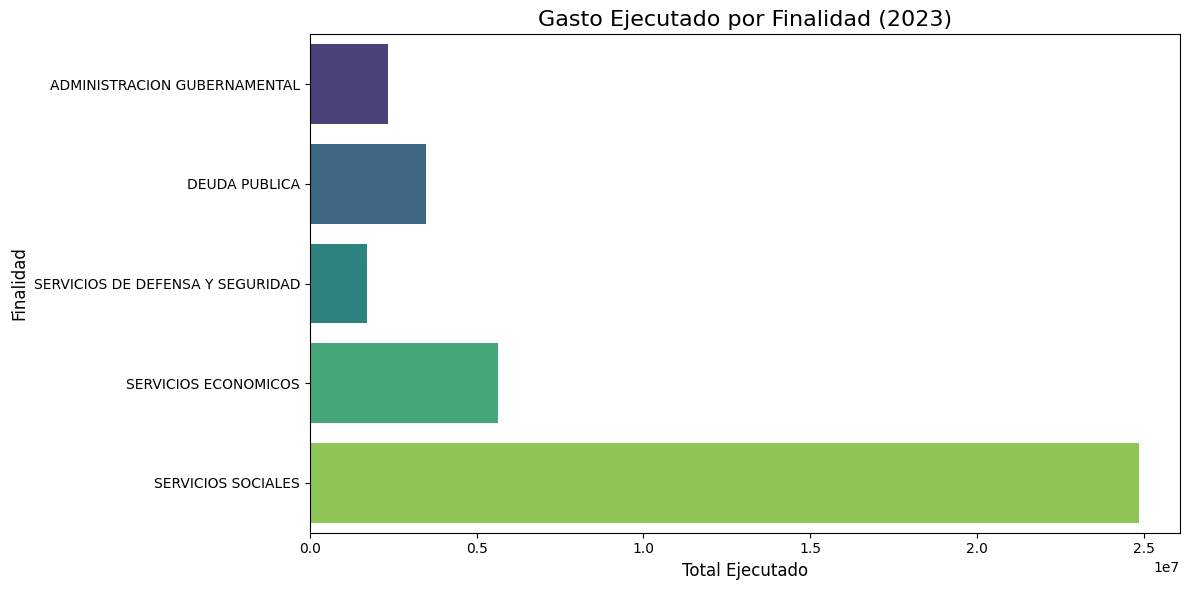

In [27]:
# Crear gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Ejecutado', y='Finalidad', data=grouped_data, palette='viridis')

# Personalización del gráfico
plt.title('Gasto Ejecutado por Finalidad (2023)', fontsize=16)
plt.xlabel('Total Ejecutado', fontsize=12)
plt.ylabel('Finalidad', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

**Aclaraciones**:

- *1e7* es la notación científica. Así no hace falta anotar 7 ceros y se facilita la comprensión y prolijidad.

- Este gráfico solo tiene razones ilustrativas. Pero aquí hay que considerar muchas cosas. Por ejemplo, este gráfico está en pesos corrientes y no serviría para comparaciones interanuales.

## Ejercicio 8

In [28]:
datos_ej8 = [67, 63, 64, 57, 56, 55, 53, 53, 54, 54,
             45, 45, 46, 47, 37, 23, 34, 44, 27, 44,
             45, 34, 34, 15, 23, 43, 16, 44, 36, 36,
             35, 37, 24, 24, 14, 43, 37, 27, 36, 26,
             25, 36, 26, 5, 44, 13, 33, 33, 17, 33]


MIN = min(datos_ej8)
MAX = max(datos_ej8)
lista_decimales = [contar_decimales(x) for x in datos_ej8]
numero_max_decimales_por_pareja = max(lista_decimales)
amplitud = 5 
cantidad_intervalos = np.ceil((MAX-MIN+1*(10**(-numero_max_decimales_por_pareja)))/(amplitud))

cantidad_intervalos

13.0

In [29]:
lim_ap_ej8 = []
while True:
    if len(lim_ap_ej8) == 0:
        a = MIN
        b = MIN + amplitud -1*(10**(-numero_max_decimales_por_pareja))
        lim_ap_ej8.append([a,b])
    elif len(lim_ap_ej8) >= cantidad_intervalos:
        break
    else:
        a = b + 1*(10**(-numero_max_decimales_por_pareja))
        b = a + amplitud - 1*(10**(-numero_max_decimales_por_pareja))
        lim_ap_ej8.append([a,b])

distribucion_frecuencia8 = pd.DataFrame({'Límites aparentes': lim_ap_ej8})
distribucion_frecuencia8


,Límites aparentes
0,"[5, 9]"
1,"[10, 14]"
2,"[15, 19]"
3,"[20, 24]"
4,"[25, 29]"
5,"[30, 34]"
6,"[35, 39]"
7,"[40, 44]"
8,"[45, 49]"
9,"[50, 54]"


In [30]:
lim_ver_ej8 = [limites_verdaderos(x[0], x[1]) for x in lim_ap_ej8]
distribucion_frecuencia8['Límites verdaderos'] = pd.Series(lim_ver_ej8)
distribucion_frecuencia8

,Límites aparentes,Límites verdaderos
0,"[5, 9]","[4.5, 9.5]"
1,"[10, 14]","[9.5, 14.5]"
2,"[15, 19]","[14.5, 19.5]"
3,"[20, 24]","[19.5, 24.5]"
4,"[25, 29]","[24.5, 29.5]"
5,"[30, 34]","[29.5, 34.5]"
6,"[35, 39]","[34.5, 39.5]"
7,"[40, 44]","[39.5, 44.5]"
8,"[45, 49]","[44.5, 49.5]"
9,"[50, 54]","[49.5, 54.5]"


In [31]:
puntos_medios_ej8 = [x[0]+(x[1]-x[0])/2 for x in lim_ver_ej8]
distribucion_frecuencia8['Puntos medios'] = pd.Series(puntos_medios_ej8)
distribucion_frecuencia8

,Límites aparentes,Límites verdaderos,Puntos medios
0,"[5, 9]","[4.5, 9.5]",7.0
1,"[10, 14]","[9.5, 14.5]",12.0
2,"[15, 19]","[14.5, 19.5]",17.0
3,"[20, 24]","[19.5, 24.5]",22.0
4,"[25, 29]","[24.5, 29.5]",27.0
5,"[30, 34]","[29.5, 34.5]",32.0
6,"[35, 39]","[34.5, 39.5]",37.0
7,"[40, 44]","[39.5, 44.5]",42.0
8,"[45, 49]","[44.5, 49.5]",47.0
9,"[50, 54]","[49.5, 54.5]",52.0


In [32]:
bins = [x[0] for x in lim_ver_ej8] + [lim_ver_ej8[-1][1]]
bins

[4.5,
 9.5,
 14.5,
 19.5,
 24.5,
 29.5,
 34.5,
 39.5,
 44.5,
 49.5,
 54.5,
 59.5,
 64.5,
 69.5]

In [33]:
frecuencias_ej8 = pd.cut(datos_ej8, bins = bins, right = False).value_counts()
frecuencias_ej8

[4.5, 9.5)      1
[9.5, 14.5)     2
[14.5, 19.5)    3
[19.5, 24.5)    4
[24.5, 29.5)    5
[29.5, 34.5)    6
[34.5, 39.5)    8
[39.5, 44.5)    6
[44.5, 49.5)    5
[49.5, 54.5)    4
[54.5, 59.5)    3
[59.5, 64.5)    2
[64.5, 69.5)    1
dtype: int64

In [34]:
distribucion_frecuencia8['Frecuencias absolutas'] = frecuencias_ej8.values
distribucion_frecuencia8

,Límites aparentes,Límites verdaderos,Puntos medios,Frecuencias absolutas
0,"[5, 9]","[4.5, 9.5]",7.0,1
1,"[10, 14]","[9.5, 14.5]",12.0,2
2,"[15, 19]","[14.5, 19.5]",17.0,3
3,"[20, 24]","[19.5, 24.5]",22.0,4
4,"[25, 29]","[24.5, 29.5]",27.0,5
5,"[30, 34]","[29.5, 34.5]",32.0,6
6,"[35, 39]","[34.5, 39.5]",37.0,8
7,"[40, 44]","[39.5, 44.5]",42.0,6
8,"[45, 49]","[44.5, 49.5]",47.0,5
9,"[50, 54]","[49.5, 54.5]",52.0,4


In [35]:
distribucion_frecuencia8['Frecuencia absoluta acumulada'] = distribucion_frecuencia8['Frecuencias absolutas'].cumsum()
distribucion_frecuencia8

,Límites aparentes,Límites verdaderos,Puntos medios,Frecuencias absolutas,Frecuencia absoluta acumulada
0,"[5, 9]","[4.5, 9.5]",7.0,1,1
1,"[10, 14]","[9.5, 14.5]",12.0,2,3
2,"[15, 19]","[14.5, 19.5]",17.0,3,6
3,"[20, 24]","[19.5, 24.5]",22.0,4,10
4,"[25, 29]","[24.5, 29.5]",27.0,5,15
5,"[30, 34]","[29.5, 34.5]",32.0,6,21
6,"[35, 39]","[34.5, 39.5]",37.0,8,29
7,"[40, 44]","[39.5, 44.5]",42.0,6,35
8,"[45, 49]","[44.5, 49.5]",47.0,5,40
9,"[50, 54]","[49.5, 54.5]",52.0,4,44


Vamos a ver la **otra forma de hacerlo**, que da igual resultado (porque pasamos los datos para que así sea.)

In [36]:
bins = np.histogram_bin_edges(datos_ej8, bins = 13, range = (4.5, 69.5))

frecuencias = pd.cut(datos_ej8, bins= bins, right= False)
distribucion_frecuencia8b = pd.DataFrame({'Intervalos': pd.Series(frecuencias).value_counts().sort_index().index,
                    'Frecuencias absolutas': pd.Series(frecuencias.value_counts().sort_index().values)})

distribucion_frecuencia8b['Frecuencia acumulada absoluta'] = distribucion_frecuencia8b['Frecuencias absolutas'].cumsum()
distribucion_frecuencia8b['Frecuencia relativa']= distribucion_frecuencia8b['Frecuencias absolutas']/distribucion_frecuencia8['Frecuencias absolutas'].sum()
distribucion_frecuencia8b['Frecuencia relativa acumulada'] = distribucion_frecuencia8b['Frecuencia relativa'].cumsum()
distribucion_frecuencia8b

,Intervalos,Frecuencias absolutas,Frecuencia acumulada absoluta,Frecuencia relativa,Frecuencia relativa acumulada
0,"[4.5, 9.5)",1,1,0.02,0.02
1,"[9.5, 14.5)",2,3,0.04,0.06
2,"[14.5, 19.5)",3,6,0.06,0.12
3,"[19.5, 24.5)",4,10,0.08,0.20
4,"[24.5, 29.5)",5,15,0.10,0.30
5,"[29.5, 34.5)",6,21,0.12,0.42
6,"[34.5, 39.5)",8,29,0.16,0.58
7,"[39.5, 44.5)",6,35,0.12,0.70
8,"[44.5, 49.5)",5,40,0.10,0.80
9,"[49.5, 54.5)",4,44,0.08,0.88


## Ejercicio 9

In [37]:
inf = 3
sup = 7
amplitud = 5 # lo sabemos por los datos del primer intervalo que nos da el ejercicio (4-5).
cantidad_intervalos = np.ceil((max(datos_ej8) - min(datos_ej8)+1)/amplitud)

"""
Como sabemos que son números enteros, esta vez optamos por invocar la 
función contar_decimales para construir los límites aparentes.
"""

intervalos = []
while True:
    if len(intervalos) == 0:
        a = inf
        b = sup
        intervalos.append([a,b])
    elif len(intervalos) >= cantidad_intervalos:
        break
    else:
        a = b + 1
        b = a +  amplitud - 1
        intervalos.append([a,b])

distribucion_frecuencia9 = pd.DataFrame({'Límites aparentes': intervalos})

limites_verdaderos9 = [limites_verdaderos(x[0], x[1]) for x in intervalos]
puntos_medios_9 = [x[0] + ((x[1]- x[0])/2) for x in intervalos]

distribucion_frecuencia9['Límites verdaderos'] = limites_verdaderos9
distribucion_frecuencia9['Puntos medios / Marcas de clase'] = puntos_medios_9

bins = [x[0] for x in limites_verdaderos9] + [limites_verdaderos9[-1][1]]
frecuencias = pd.cut(datos_ej8, bins = bins,  right = False)


distribucion_frecuencia9['Frecuencia absoluta'] = pd.Series(frecuencias).value_counts().sort_index().values
distribucion_frecuencia9['Frecuencia absoluta acumulada'] = distribucion_frecuencia9['Frecuencia absoluta'].cumsum()
distribucion_frecuencia9['Frecuencia relativa'] = distribucion_frecuencia9['Frecuencia absoluta']/distribucion_frecuencia9['Frecuencia absoluta'].sum()
distribucion_frecuencia9['Frecuencia relativa acumulada'] = distribucion_frecuencia9['Frecuencia relativa'].cumsum()

distribucion_frecuencia9

,Límites aparentes,Límites verdaderos,Puntos medios / Marcas de clase,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[3, 7]","[2.5, 7.5]",5.0,1,1,0.02,0.02
1,"[8, 12]","[7.5, 12.5]",10.0,0,1,0.00,0.02
2,"[13, 17]","[12.5, 17.5]",15.0,5,6,0.10,0.12
3,"[18, 22]","[17.5, 22.5]",20.0,0,6,0.00,0.12
4,"[23, 27]","[22.5, 27.5]",25.0,9,15,0.18,0.30
5,"[28, 32]","[27.5, 32.5]",30.0,0,15,0.00,0.30
6,"[33, 37]","[32.5, 37.5]",35.0,14,29,0.28,0.58
7,"[38, 42]","[37.5, 42.5]",40.0,0,29,0.00,0.58
8,"[43, 47]","[42.5, 47.5]",45.0,11,40,0.22,0.80
9,"[48, 52]","[47.5, 52.5]",50.0,0,40,0.00,0.80


## Ejercicio 10

In [38]:
inf = 4
sup = 5
amplitud = 2 # lo sabemos por los datos del primer intervalo que nos da el ejercicio (4-5).
cantidad_intervalos = np.ceil((max(datos_ej8) - min(datos_ej8)+1)/amplitud)

intervalos = []
while True:
    if len(intervalos) == 0:
        a = inf
        b = sup
        intervalos.append([a,b])
    elif len(intervalos) >= cantidad_intervalos:
        break
    else:
        a = b + 1
        b = a +  amplitud - 1
        intervalos.append([a,b])

distribucion_frecuencia10 = pd.DataFrame({'Límites aparentes': intervalos})

limites_verdaderos10 = [limites_verdaderos(x[0], x[1]) for x in intervalos]
puntos_medios_10 = [x[0] + ((x[1]- x[0])/2) for x in intervalos]

distribucion_frecuencia10['Límites verdaderos'] = limites_verdaderos10
distribucion_frecuencia10['Puntos medios / Marcas de clase'] = puntos_medios_10

bins = [x[0] for x in limites_verdaderos10] + [limites_verdaderos9[-1][1]]
frecuencias = pd.cut(datos_ej8, bins = bins,  right = False)


distribucion_frecuencia10['Frecuencia absoluta'] = pd.Series(frecuencias).value_counts().sort_index().values
distribucion_frecuencia10['Frecuencia absoluta acumulada'] = distribucion_frecuencia10['Frecuencia absoluta'].cumsum()
distribucion_frecuencia10['Frecuencia relativa'] = distribucion_frecuencia10['Frecuencia absoluta']/distribucion_frecuencia10['Frecuencia absoluta'].sum()
distribucion_frecuencia10['Frecuencia relativa acumulada'] = distribucion_frecuencia10['Frecuencia relativa'].cumsum()

distribucion_frecuencia10

,Límites aparentes,Límites verdaderos,Puntos medios / Marcas de clase,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[4, 5]","[3.5, 5.5]",4.5,1,1,0.02,0.02
1,"[6, 7]","[5.5, 7.5]",6.5,0,1,0.00,0.02
2,"[8, 9]","[7.5, 9.5]",8.5,0,1,0.00,0.02
3,"[10, 11]","[9.5, 11.5]",10.5,0,1,0.00,0.02
4,"[12, 13]","[11.5, 13.5]",12.5,1,2,0.02,0.04
5,"[14, 15]","[13.5, 15.5]",14.5,2,4,0.04,0.08
6,"[16, 17]","[15.5, 17.5]",16.5,2,6,0.04,0.12
7,"[18, 19]","[17.5, 19.5]",18.5,0,6,0.00,0.12
8,"[20, 21]","[19.5, 21.5]",20.5,0,6,0.00,0.12
9,"[22, 23]","[21.5, 23.5]",22.5,2,8,0.04,0.16


In [39]:
inf = 5
sup = 9
amplitud = 5
cantidad_intervalos = round((max(datos_ej8) - min(datos_ej8)+1)/amplitud)
print(cantidad_intervalos)

intervalos = []
while True:
    if len(intervalos) == 0:
        a = inf
        b = sup
        intervalos.append([a,b])
    elif len(intervalos) >= cantidad_intervalos:
        break
    else:
        a = b + 1
        b = a +  amplitud - 1
        intervalos.append([a,b])

distribucion_frecuencia10 = pd.DataFrame({'Límites aparentes': intervalos})

limites_verdaderos9 = [limites_verdaderos(x[0], x[1]) for x in intervalos]
puntos_medios = [x[0] + ((x[1]- x[0])/2) for x in intervalos]

distribucion_frecuencia10['Límites verdaderos'] = limites_verdaderos9
distribucion_frecuencia10['Puntos medios / Marcas de clase'] = puntos_medios

bins = [x[0] for x in limites_verdaderos9] + [limites_verdaderos9[-1][1]]
frecuencias = pd.cut(datos_ej8, bins = bins,  right = False)


distribucion_frecuencia10['Frecuencia absoluta'] = pd.Series(frecuencias).value_counts().sort_index().values
distribucion_frecuencia10['Frecuencia absoluta acumulada'] = distribucion_frecuencia10['Frecuencia absoluta'].cumsum()
distribucion_frecuencia10['Frecuencia relativa'] = distribucion_frecuencia10['Frecuencia absoluta']/distribucion_frecuencia10['Frecuencia absoluta'].sum()
distribucion_frecuencia10['Frecuencia relativa acumulada'] = distribucion_frecuencia10['Frecuencia relativa'].cumsum()

distribucion_frecuencia10

13


,Límites aparentes,Límites verdaderos,Puntos medios / Marcas de clase,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[5, 9]","[4.5, 9.5]",7.0,1,1,0.02,0.02
1,"[10, 14]","[9.5, 14.5]",12.0,2,3,0.04,0.06
2,"[15, 19]","[14.5, 19.5]",17.0,3,6,0.06,0.12
3,"[20, 24]","[19.5, 24.5]",22.0,4,10,0.08,0.20
4,"[25, 29]","[24.5, 29.5]",27.0,5,15,0.10,0.30
5,"[30, 34]","[29.5, 34.5]",32.0,6,21,0.12,0.42
6,"[35, 39]","[34.5, 39.5]",37.0,8,29,0.16,0.58
7,"[40, 44]","[39.5, 44.5]",42.0,6,35,0.12,0.70
8,"[45, 49]","[44.5, 49.5]",47.0,5,40,0.10,0.80
9,"[50, 54]","[49.5, 54.5]",52.0,4,44,0.08,0.88


## Ejercicio 11

In [40]:
inf = 0
sup = 9
amplitud = 10
cantidad_intervalos = np.ceil((max(datos_ej8) - min(datos_ej8)+1)/amplitud)
print(cantidad_intervalos)

intervalos = []
while True:
    if len(intervalos) == 0:
        a = inf
        b = sup
        intervalos.append([a,b])
    elif len(intervalos) >= cantidad_intervalos:
        break
    else:
        a = b + 1
        b = a +  amplitud - 1
        intervalos.append([a,b])

distribucion_frecuencia11 = pd.DataFrame({'Límites aparentes': intervalos})

limites_verdaderos11 = [limites_verdaderos(x[0], x[1]) for x in intervalos]
puntos_medios = [x[0] + ((x[1]- x[0])/2) for x in intervalos]

distribucion_frecuencia11['Límites verdaderos'] = limites_verdaderos11
distribucion_frecuencia11['Puntos medios / Marcas de clase'] = puntos_medios

bins = [x[0] for x in limites_verdaderos11] + [limites_verdaderos11[-1][1]]
frecuencias = pd.cut(datos_ej8, bins = bins,  right = False)


distribucion_frecuencia11['Frecuencia absoluta'] = pd.Series(frecuencias).value_counts().sort_index().values
distribucion_frecuencia11['Frecuencia absoluta acumulada'] = distribucion_frecuencia11['Frecuencia absoluta'].cumsum()
distribucion_frecuencia11['Frecuencia relativa'] = distribucion_frecuencia11['Frecuencia absoluta']/distribucion_frecuencia11['Frecuencia absoluta'].sum()
distribucion_frecuencia11['Frecuencia relativa acumulada'] = distribucion_frecuencia11['Frecuencia relativa'].cumsum()

distribucion_frecuencia11

7.0


,Límites aparentes,Límites verdaderos,Puntos medios / Marcas de clase,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[0, 9]","[-0.5, 9.5]",4.5,1,1,0.02,0.02
1,"[10, 19]","[9.5, 19.5]",14.5,5,6,0.10,0.12
2,"[20, 29]","[19.5, 29.5]",24.5,9,15,0.18,0.30
3,"[30, 39]","[29.5, 39.5]",34.5,14,29,0.28,0.58
4,"[40, 49]","[39.5, 49.5]",44.5,11,40,0.22,0.80
5,"[50, 59]","[49.5, 59.5]",54.5,7,47,0.14,0.94
6,"[60, 69]","[59.5, 69.5]",64.5,3,50,0.06,1.00


## Ejercicio 13

In [41]:
intervalos_de_clase = [[110,114], [115,119], [120,124], [125,129], [130,134], [135,139], [140,144], [145,149], [150,154], [155,159], [160,164]]

lim_ver_13 = [limites_verdaderos(x[0], x[1]) for x in intervalos_de_clase]

puntos_medios = [x[0] + (x[1]-x[0])/2 for x in lim_ver_13]

frecuencias_abs_13 = [1,3,8,11,17,22,14,6,10,3,1]

distribucion_frecuencia13 = pd.DataFrame({
    'Intervalos de clase' : intervalos_de_clase,
    'Límites verdaderos': lim_ver_13,
    'Puntos medios' : puntos_medios,
    'Frecuencia absoluta' : frecuencias_abs_13
})

distribucion_frecuencia13['Frecuencia absoluta acumulada'] = distribucion_frecuencia13['Frecuencia absoluta'].cumsum()
distribucion_frecuencia13['Frecuencia relativa'] = distribucion_frecuencia13['Frecuencia absoluta'] / distribucion_frecuencia13['Frecuencia absoluta'].sum()
distribucion_frecuencia13['Frecuencia relativa acumulada'] = distribucion_frecuencia13['Frecuencia relativa'].cumsum()
distribucion_frecuencia13


,Intervalos de clase,Límites verdaderos,Puntos medios,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[110, 114]","[109.5, 114.5]",112.0,1,1,0.010417,0.010417
1,"[115, 119]","[114.5, 119.5]",117.0,3,4,0.031250,0.041667
2,"[120, 124]","[119.5, 124.5]",122.0,8,12,0.083333,0.125000
3,"[125, 129]","[124.5, 129.5]",127.0,11,23,0.114583,0.239583
4,"[130, 134]","[129.5, 134.5]",132.0,17,40,0.177083,0.416667
5,"[135, 139]","[134.5, 139.5]",137.0,22,62,0.229167,0.645833
6,"[140, 144]","[139.5, 144.5]",142.0,14,76,0.145833,0.791667
7,"[145, 149]","[144.5, 149.5]",147.0,6,82,0.062500,0.854167
8,"[150, 154]","[149.5, 154.5]",152.0,10,92,0.104167,0.958333
9,"[155, 159]","[154.5, 159.5]",157.0,3,95,0.031250,0.989583


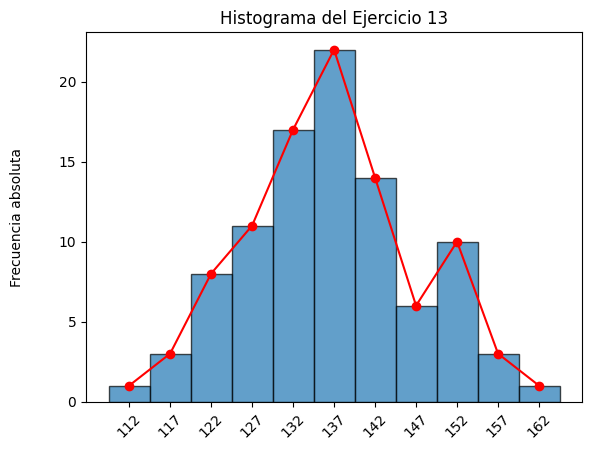

In [42]:
# Graficar el histograma
plt.bar(puntos_medios, frecuencias_abs_13, width=5, edgecolor='black', alpha=0.7) # alpha es el parámetro que de intensidad del color

# Personalizar el gráfico
plt.ylabel('Frecuencia absoluta',  labelpad= 25)
plt.title('Histograma del Ejercicio 13')
plt.xticks(puntos_medios, rotation = 45)

plt.plot(puntos_medios, frecuencias_abs_13, marker = 'o', color = 'red')
plt.show()

## Ejercicio 15

Para el ejercicio del lanzamiento de datos, utilizamos el módulo *Random* dentro de la biblioteca *Numpy*.

A su vez, dentro del módulo, usamos la función *randint* que sirve para generar números aleatorios **enteros**.

La función *randint()* tiene los siguientes parámetros:

- El valor más bajo que puede generarse: como se trata de lanzamiento de dados, el valor más bajo es el 1.

- El valor más alto del **rango**: cuidado, este **no** es el valor más alto que puede generarse, sino el tope del rango en el que pueden generarse los números, valor que queda **excluido**. En términos matemáticos, se genera un intervalo semiabierto. En este caso:

    [1, 7)

    Como aquí se generan números enteros, el valor más alto posible es 6.

- La cantidad de números que queremos (*size*)

In [45]:
primer_dado = list(np.random.randint(1, 7, size = 100))
segundo_dado = list(np.random.randint(1, 7, size = 100))

suma_dados = [a + b for a, b in zip(primer_dado, segundo_dado)]

"""Recordemos que zip() permite operar con los valores de igual índice de un iterable: el índice 0
de una lista con el índice 0 de otra, el 1 con el 1, etc."""

print(suma_dados)
print(len(suma_dados)) #chequeamos que la lista tenga 100 elementos

"""Cada vez que ejecutan este código, se vuelven a generar los números aleatorios."""

[6, 11, 5, 10, 12, 8, 9, 6, 9, 8, 12, 7, 5, 9, 7, 5, 9, 10, 5, 2, 8, 10, 10, 8, 7, 9, 7, 7, 7, 5, 9, 4, 9, 8, 6, 10, 9, 5, 7, 4, 11, 8, 3, 3, 5, 4, 5, 9, 7, 6, 2, 11, 7, 6, 4, 10, 9, 4, 10, 10, 7, 7, 8, 7, 10, 7, 8, 7, 7, 8, 10, 6, 6, 6, 9, 5, 10, 10, 5, 6, 6, 11, 8, 8, 6, 7, 7, 9, 12, 8, 5, 9, 7, 10, 4, 10, 6, 11, 5, 7]
100


'Cada vez que ejecutan este código, se vuelven a generar los números aleatorios.'

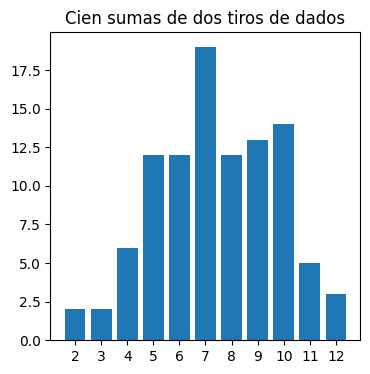

In [47]:
frecuencias = pd.Series(suma_dados).value_counts().sort_index()

plt.figure (figsize= (4, 4))
plt.bar(x= frecuencias.index, height= frecuencias.values)
plt.xticks(frecuencias.index)
plt.title("Cien sumas de dos tiros de dados")
plt.show()

In [48]:
# Hacemos una rápida distribución de frecuencias para chequear que el histograma esté bien.
# La primera columna (index) es la suma de dados. La segunda (values), las frecuencias
frecuencias = pd.Series(suma_dados).value_counts().sort_index()
frecuencias

2      2
3      2
4      6
5     12
6     12
7     19
8     12
9     13
10    14
11     5
12     3
dtype: int64

## Ejercicio 16

In [49]:
datos_ej16 = pd.DataFrame({
    'Vendedor': ['Reyes', 'Martínez', 'Perez', 'González', 'Parra'],
    'Ventas': [22500,17900,21400,22100,20700]
})

datos_ej16

,Vendedor,Ventas
0,Reyes,22500
1,Martínez,17900
2,Perez,21400
3,González,22100
4,Parra,20700


### Parte A

(0.0, 5000.0)

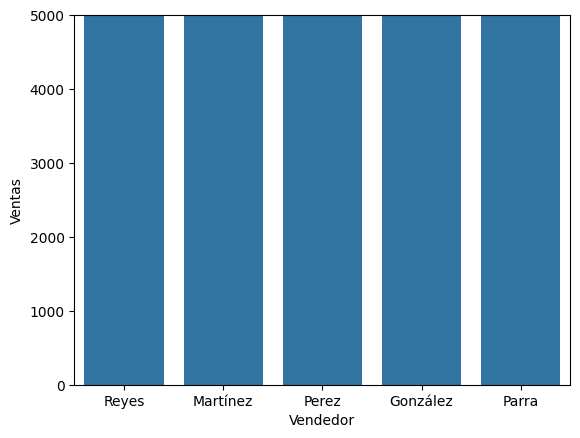

In [50]:
sns.barplot(datos_ej16, x = 'Vendedor', y= 'Ventas')
plt.ylim(0, 5000) 

Es fácil de ver que estamos cortando el gráfico en un valor que no es el máximo de ventas.

### Parte B

(0.0, 22500.0)

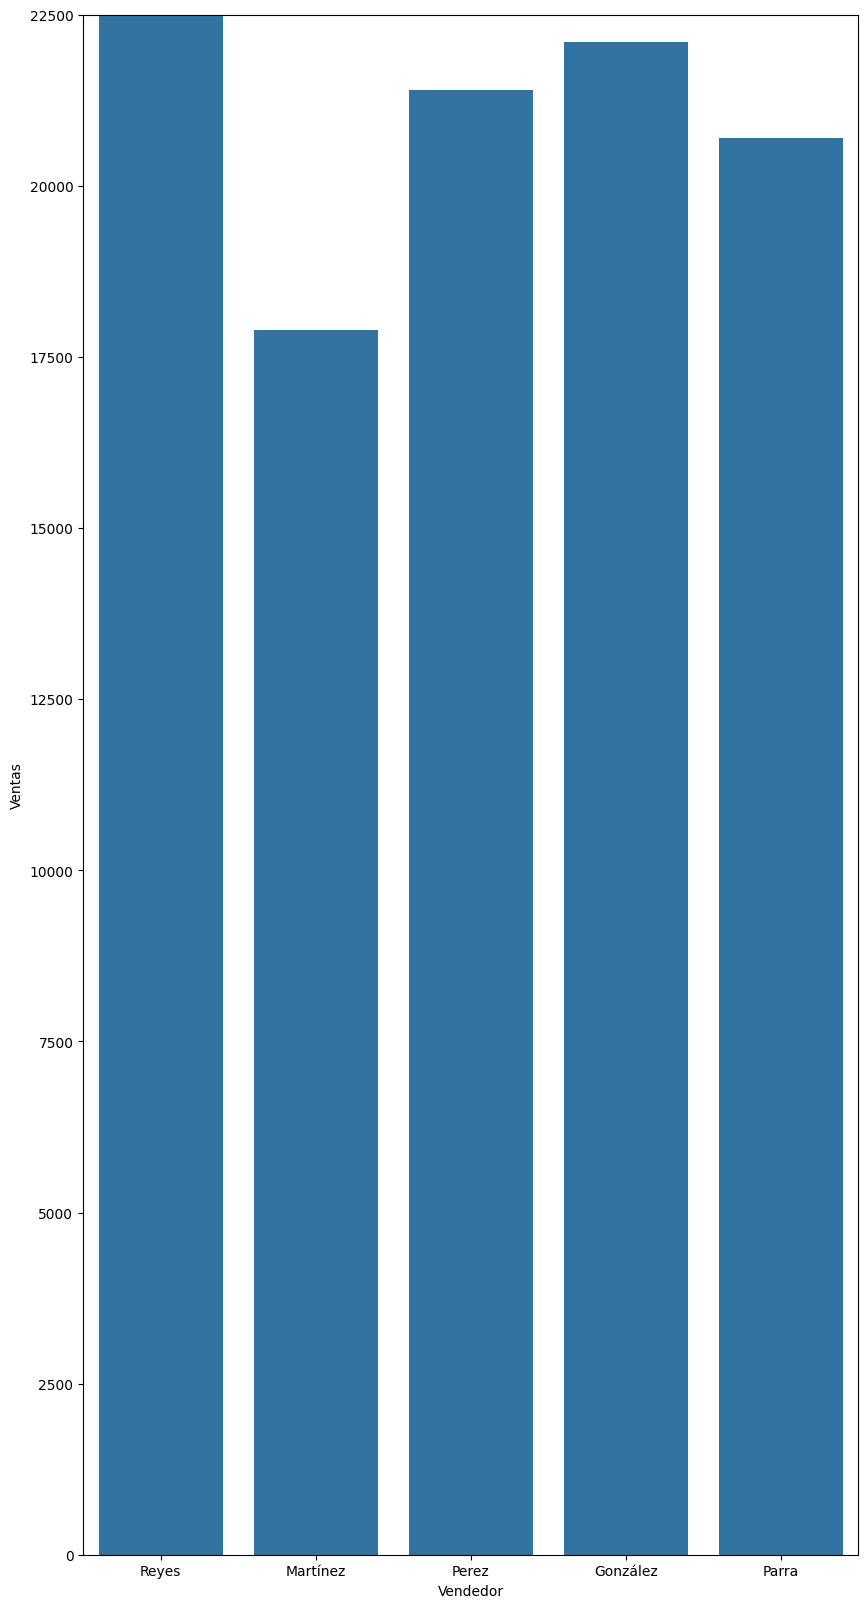

In [51]:
plt.figure(figsize = (10,20))
sns.barplot(data= datos_ej16, x= 'Vendedor', y= 'Ventas')
plt.ylim(0, np.max(datos_ej16['Ventas']))



Acá exageramos el bache del señor Martínez

### Parte C

(0.0, 100000.0)

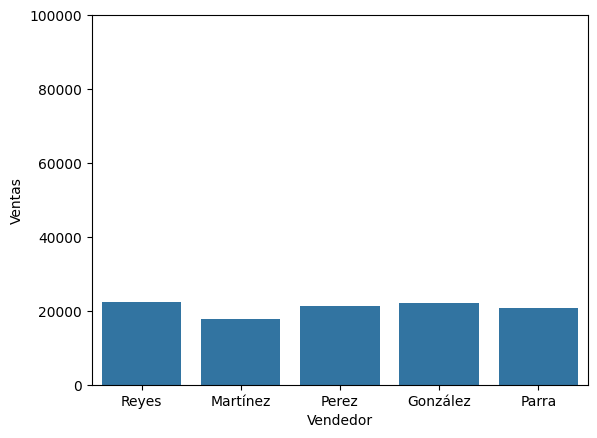

In [52]:
sns.barplot(datos_ej16, x = 'Vendedor', y= 'Ventas')
plt.ylim(0, 100000) 

Acá subestimamos los resultados de todos

## Ejercicio 17

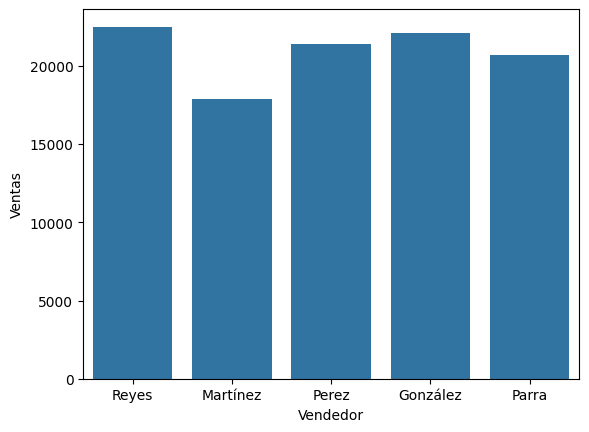

In [53]:
sns.barplot(datos_ej16, x = 'Vendedor', y= 'Ventas')
plt.show()

## Ejercicio 18

In [54]:
datos_ej18 = pd.DataFrame({
    'Intervalo de clase': [[50,52], [47,49], [44,46], [41,43], [38,40], [35,37], [32,34],[29,31],[26,28],[23,25],[20,22],[17,19],[14,16]],
    'Grupo A': [5,12,18,19,26,19,13,9,6,4,3,1,2],
    'Grupo B': [2,3,5,8,12,24,35,22,11,9,6,4,2]
})

datos_ej18

,Intervalo de clase,Grupo A,Grupo B
0,"[50, 52]",5,2
1,"[47, 49]",12,3
2,"[44, 46]",18,5
3,"[41, 43]",19,8
4,"[38, 40]",26,12
5,"[35, 37]",19,24
6,"[32, 34]",13,35
7,"[29, 31]",9,22
8,"[26, 28]",6,11
9,"[23, 25]",4,9


In [55]:
puntos_medios_ej18 = [(x[0]+ x[1]) / 2 for x in datos_ej18['Intervalo de clase']]
datos_ej18['Puntos medios'] = puntos_medios_ej18
datos_ej18

,Intervalo de clase,Grupo A,Grupo B,Puntos medios
0,"[50, 52]",5,2,51.0
1,"[47, 49]",12,3,48.0
2,"[44, 46]",18,5,45.0
3,"[41, 43]",19,8,42.0
4,"[38, 40]",26,12,39.0
5,"[35, 37]",19,24,36.0
6,"[32, 34]",13,35,33.0
7,"[29, 31]",9,22,30.0
8,"[26, 28]",6,11,27.0
9,"[23, 25]",4,9,24.0


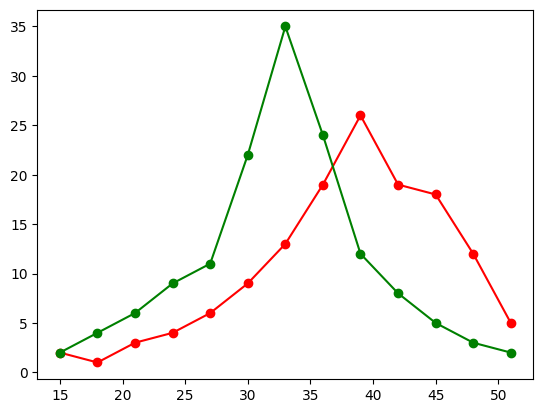

In [56]:
plt.plot(puntos_medios_ej18, datos_ej18['Grupo A'], marker = 'o', color= 'red')
plt.plot(puntos_medios_ej18, datos_ej18['Grupo B'], marker = 'o', color= 'green')
plt.show()


## Ejercicio 19

a) Positivamente sesgado

b) Normal

c) Normal

d) Bimodal


## Ejercicio 20

In [57]:
datos_ej20 = pd.DataFrame()

datos_ej20['Intervalo de clase'] = sorted([[95,99], [90,94], [85,89], [80,84],
                                    [75,79], [70,74], [65,69], [60,64],
                                    [55,59], [50,54], [45,49]])

"La función sorted() ordena la lista de listas de menor a mayor"

datos_ej20['Frecuencia']= [1,0,3,6,11,18,16,9,5,2,2]
datos_ej20['Frecuencia acumulada'] = datos_ej20['Frecuencia'].cumsum()

datos_ej20

,Intervalo de clase,Frecuencia,Frecuencia acumulada
0,"[45, 49]",1,1
1,"[50, 54]",0,1
2,"[55, 59]",3,4
3,"[60, 64]",6,10
4,"[65, 69]",11,21
5,"[70, 74]",18,39
6,"[75, 79]",16,55
7,"[80, 84]",9,64
8,"[85, 89]",5,69
9,"[90, 94]",2,71


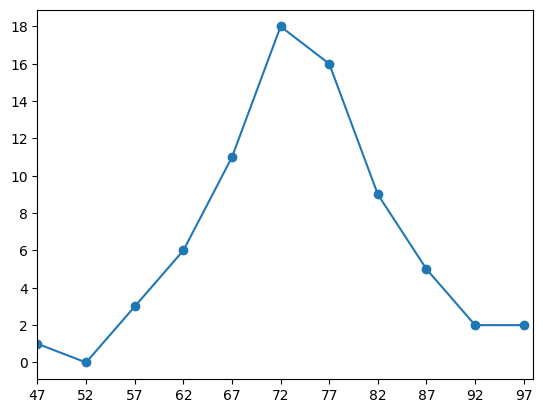

In [58]:
plt.plot([(x[0] + x[1])/2 for x in datos_ej20['Intervalo de clase']],
         datos_ej20['Frecuencia'], marker = 'o')

plt.xlim(min([(x[0] + x[1])/2 for x in datos_ej20['Intervalo de clase']]), 
         max([(x[0] + x[1])/2 for x in datos_ej20['Intervalo de clase']])+1)

plt.xticks([(x[0] + x[1])/2 for x in datos_ej20['Intervalo de clase']])
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])

plt.show()

La expresión

    [(x[0] + x[1])/2 for x in datos_ej20['Intervalo de clase']]

no es nada más que los puntos medios de la distribución de frecuencias, los cuales usamos para establecer los valores (*ticks*) que queremos que se muestren en el eje horizontal.

Por otro lado, también configuramos los *ticks* del eje vertical: queda mejor visualmente que con la simple limitación de valores de *plt.ylim()* (pueden probar si gustan).

## Ejercicio 21

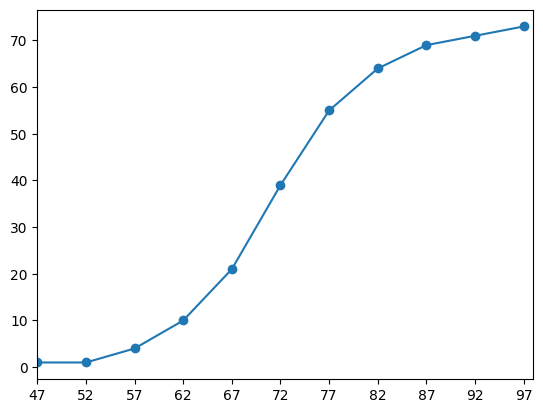

In [59]:
plt.plot([(x[0]+x[1])/2 for x in datos_ej20['Intervalo de clase']],
         datos_ej20['Frecuencia'].cumsum(), marker = 'o')

plt.xlim(min([(x[0] + x[1])/2 for x in datos_ej20['Intervalo de clase']]), 
         max([(x[0] + x[1])/2 for x in datos_ej20['Intervalo de clase']])+1)

plt.xticks([(x[0] + x[1])/2 for x in datos_ej20['Intervalo de clase']])

plt.show()

## Ejercicio 22

In [60]:
datos_ej22 = pd.DataFrame({
    'Año' : [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969],
    'Total niños nacidos vivos': [4284, 4396, 4290, 4335, 3923, 3615, 3089, 2688, 2283, 2367],
    'Total madres drogadictas': [26, 36, 43, 44, 31, 28, 31, 47, 46, 50]
})

datos_ej22

,Año,Total niños nacidos vivos,Total madres drogadictas
0,1960,4284,26
1,1961,4396,36
2,1962,4290,43
3,1963,4335,44
4,1964,3923,31
5,1965,3615,28
6,1966,3089,31
7,1967,2688,47
8,1968,2283,46
9,1969,2367,50


In [61]:
datos_ej22['Porcentaje de madres drogadictas'] = round(datos_ej22['Total madres drogadictas']/datos_ej22['Total niños nacidos vivos'] * 100, 2)
datos_ej22

,Año,Total niños nacidos vivos,Total madres drogadictas,Porcentaje de madres drogadictas
0,1960,4284,26,0.61
1,1961,4396,36,0.82
2,1962,4290,43,1.00
3,1963,4335,44,1.01
4,1964,3923,31,0.79
5,1965,3615,28,0.77
6,1966,3089,31,1.00
7,1967,2688,47,1.75
8,1968,2283,46,2.01
9,1969,2367,50,2.11


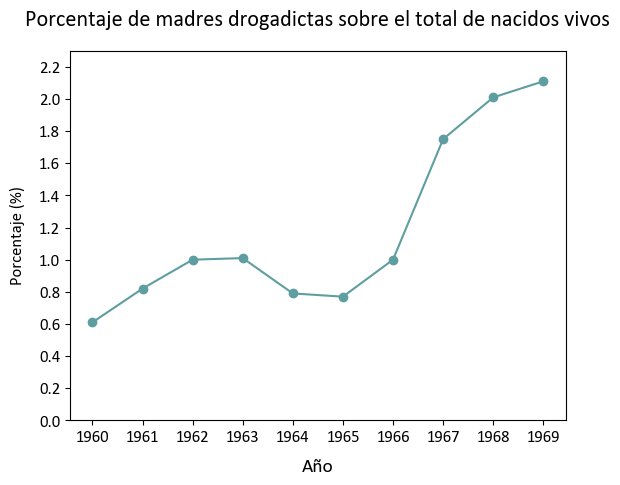

In [62]:
plt.xticks(datos_ej22['Año'], fontname = 'Calibri', fontsize = 12)
plt.yticks(np.arange(0.0, 2.4, 0.2),fontname = 'Calibri', fontsize = 12)
plt.xlabel('Año', fontname = 'Calibri', fontsize = 14, loc = 'center', labelpad = 10)
plt.ylim((0,2.3))
plt.ylabel('Porcentaje (%)', fontname = 'Calibri', fontsize = 12, labelpad = 10)
plt.title('Porcentaje de madres drogadictas sobre el total de nacidos vivos', fontname = 'Calibri', fontsize = 16, pad = 18)
plt.plot(datos_ej22['Año'], datos_ej22['Porcentaje de madres drogadictas'], marker = 'o', color = '#5F9EA0')

plt.show()

## Ejercicio 23

In [63]:
datos_ej23 = datos_ej22
datos_ej23['p de hijos de madres drogadictas con peso menor a 2500 g.'] = [69,52.7,56.8,40.9,29.0,50.0,54.8,52,45.6,48.8]
datos_ej23['p del total de niños nacidos vivos con peso menor a 2500 g'] = [13.9,15.9,15.8,15.1,14.4,12.6,14.2,14.7,14.6,12.7]
datos_ej23

,Año,Total niños nacidos vivos,Total madres drogadictas,Porcentaje de madres drogadictas,p de hijos de madres drogadictas con peso menor a 2500 g.,p del total de niños nacidos vivos con peso menor a 2500 g
0,1960,4284,26,0.61,69.0,13.9
1,1961,4396,36,0.82,52.7,15.9
2,1962,4290,43,1.00,56.8,15.8
3,1963,4335,44,1.01,40.9,15.1
4,1964,3923,31,0.79,29.0,14.4
5,1965,3615,28,0.77,50.0,12.6
6,1966,3089,31,1.00,54.8,14.2
7,1967,2688,47,1.75,52.0,14.7
8,1968,2283,46,2.01,45.6,14.6
9,1969,2367,50,2.11,48.8,12.7


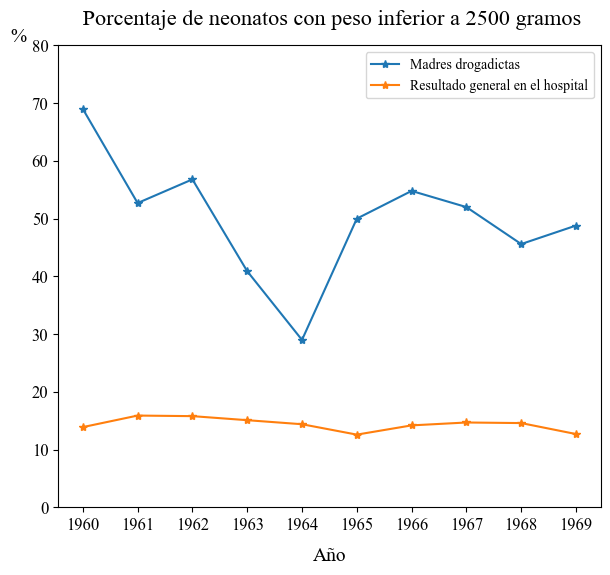

In [64]:
plt.figure(figsize = (7,6))
plt.plot(datos_ej23['Año'], datos_ej23['p de hijos de madres drogadictas con peso menor a 2500 g.'], label = 'Madres drogadictas', marker = '*')
plt.plot(datos_ej23['Año'], datos_ej23['p del total de niños nacidos vivos con peso menor a 2500 g'], label = 'Resultado general en el hospital', marker = '*')
plt.legend(prop = {'family': 'Times New Roman'})
plt.ylim(0,80)
plt.title(' Porcentaje de neonatos con peso inferior a 2500 gramos', fontname = 'Times New Roman', pad = 15, fontsize = 16)
plt.xlabel('Año', fontname= 'Times New Roman', labelpad = 10, fontsize = 14)
plt.ylabel('%', fontname= 'Times New Roman', rotation = 0, loc = 'top', fontsize = 14)
plt.xticks(datos_ej23['Año'] , fontname= 'Times New Roman', fontsize = 12)
plt.yticks(fontname= 'Times New Roman', fontsize = 12)

plt.show()

## Ejercicio 24

### Parte A

In [65]:
datos_ej24 = [67,75,63,71,65,73,71,88,61,
              65,56,62,58,72,66,76,77,75,
              61,70,64,71,63,61,63,64,62,
              69,60,66,78,92,64,64,69,64,
              65,75,72,67,88,74,65,73,
              78,62,68,69,67,57,65,58]

lista_mayores_70 = []
for x in datos_ej24:
    if x > 70:
        lista_mayores_70.append(x)

# Otra forma
# lista_mayores_70 =[x for x in datos_ej24 if x>70] La condición 'if' va al final 

porcentaje_sin_stock = round((len(lista_mayores_70)/len(datos_ej24)) * 100, 2)
print(f"Probabilidad de no satisfacción de demanda: {porcentaje_sin_stock}%")


Probabilidad de no satisfacción de demanda: 34.62%


### Partes B y C

Vamos a agregarle un poco de elegancia a las distribuciones de frecuencia.

Si ustedes observan con detenimiento las distribuciones hechas hasta ahora, verán que los intervalos, tanto de los límites aparentes como los de los límites verdaderos, aparecen con corchetes.

Si bien para los primeros eso está bien, para los segundos no, porque son intervalos semiabiertos (cerrados en la izquierda y abiertos a la derecha). Si los intervalos de límties verdaderos fueran cerrados, se estarían solapando los valores y se generaría un problema de doble contabilidad. 

¿Por qué aparecen así? Sencillamente, porque estamos trabajando con listas, cuyo *delimitador* es el corchete, así como en las tuplas es el paréntesis. Como en los DataFrame mostramos las listas, estas aparecen con los corchetes.

¿Podemos cambiar eso? Sí, si en lugar de incluir en el DataFrame las listas, incluimos **cadenas de caracteres** que se basen en esas listas, de forma que podamos transformalas como querramos.

Así, verán en el código que aparecen las listas de *strings*:

- col_int24b

- col_ver24b

que refieren, respectivamente, a las columnas de intervalos y límites verdaderos de la distribución de frecuencias.

In [66]:
MIN = min(datos_ej24)
MAX = max(datos_ej24)
amplitud = 58.5-55.5
cantidad_intervalos = np.ceil((MAX - MIN + 1)/amplitud)

intervalos = []
while True:
    if len(intervalos) == 0:
        a = 56
        b = a + amplitud - 1
        intervalos.append([a,b])
    if len(intervalos) == cantidad_intervalos:
        break
    else:
        a = b + 1
        b = a + amplitud -1
        intervalos.append([a,b])

col_int24b = [f"{x[0]} - {x[1]}" for x in intervalos] # Realizamos la lista de cadena de caracteres

lim_ver24b = [limites_verdaderos(x[0], x[1]) for x in intervalos]
col_ver24b = [ f"[{x[0]}, {x[1]})"  for x in lim_ver24b] # Realizamos la lista de cadenas de caracteres


puntos_medios24b = [(x[0]+x[1])/2 for x in intervalos]

bins = [x[0] for x in lim_ver24b] + [lim_ver24b[-1][1]]

datos_en_intervalos = pd.cut(datos_ej24, bins =bins, right = False)
frecuencias = pd.Series(datos_en_intervalos).value_counts().sort_index()

distribucion_frecuencia24 = pd.DataFrame()
distribucion_frecuencia24["Intervalos de clase"] = col_int24b # Incluimos esta lista, no la lista de intervalos
distribucion_frecuencia24["Límites verdaderos"] = col_ver24b # Incluimos esta lista, no lim_ver24b
distribucion_frecuencia24["Marcas de clase"] = puntos_medios24b
distribucion_frecuencia24["Frecuencia absoluta"] = frecuencias.values
distribucion_frecuencia24["Frecuencia acumulada"] = distribucion_frecuencia24["Frecuencia absoluta"].cumsum()
distribucion_frecuencia24["Frecuencia relativa"] = round((distribucion_frecuencia24["Frecuencia absoluta"] / distribucion_frecuencia24["Frecuencia absoluta"].sum())* 100,2)
distribucion_frecuencia24["Frecuencia relativa acumulada"] = round(distribucion_frecuencia24["Frecuencia relativa"].cumsum(), 2)
distribucion_frecuencia24


,Intervalos de clase,Límites verdaderos,Marcas de clase,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,56 - 58.0,"[55.5, 58.5)",57.0,4,4,7.69,7.69
1,59.0 - 61.0,"[58.5, 61.5)",60.0,4,8,7.69,15.38
2,62.0 - 64.0,"[61.5, 64.5)",63.0,11,19,21.15,36.53
3,65.0 - 67.0,"[64.5, 67.5)",66.0,10,29,19.23,55.76
4,68.0 - 70.0,"[67.5, 70.5)",69.0,5,34,9.62,65.38
5,71.0 - 73.0,"[70.5, 73.5)",72.0,7,41,13.46,78.84
6,74.0 - 76.0,"[73.5, 76.5)",75.0,5,46,9.62,88.46
7,77.0 - 79.0,"[76.5, 79.5)",78.0,3,49,5.77,94.23
8,80.0 - 82.0,"[79.5, 82.5)",81.0,0,49,0.00,94.23
9,83.0 - 85.0,"[82.5, 85.5)",84.0,0,49,0.00,94.23


Como se ve, ahora se muestran correctamente (en el sentido matemático) los intervalos.

### Parte D

In [67]:
amplitud = 59.5 - 54.5

cantidad_intervalos = np.ceil((MAX - MIN + 1)/amplitud)

intervalos = []
while True:
    if len(intervalos) == 0:
        a = 55.0
        b = 59.0
        intervalos.append([a,b])
    if len(intervalos) == cantidad_intervalos:
        break
    else:
        a = b + 1
        b = a + amplitud - 1
        intervalos.append([a,b])

lim_ver24c = [limites_verdaderos(x[0], x[1]) for x in intervalos]

col_int24c = [f"{x[0]} - {x[1]}" for x in intervalos]
col_ver24c = [f"[{x[0]}, {x[1]})" for x in lim_ver24c]
puntos_medios24c = [(x[0] + x[1])/2 for x in intervalos]

bins = [x[0] for x in lim_ver24c] + [lim_ver24c[-1][1]]

datos_en_intervalos = pd.cut(datos_ej24, bins =bins, right = False)
frecuencias = pd.Series(datos_en_intervalos).value_counts().sort_index()

distribucion_frecuencia24 = pd.DataFrame()
distribucion_frecuencia24["Intervalos de clase"] = col_int24c
distribucion_frecuencia24["Límites verdaderos"] = col_ver24c
distribucion_frecuencia24["Marcas de clase"] = puntos_medios24c
distribucion_frecuencia24["Frecuencia absoluta"] = frecuencias.values
distribucion_frecuencia24["Frecuencia acumulada"] = distribucion_frecuencia24["Frecuencia absoluta"].cumsum()
distribucion_frecuencia24["Frecuencia relativa"] = round((distribucion_frecuencia24["Frecuencia absoluta"] / distribucion_frecuencia24["Frecuencia absoluta"].sum())* 100,2)
distribucion_frecuencia24["Frecuencia relativa acumulada"] = round(distribucion_frecuencia24["Frecuencia relativa"].cumsum(), 2)
distribucion_frecuencia24

,Intervalos de clase,Límites verdaderos,Marcas de clase,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,55.0 - 59.0,"[54.5, 59.5)",57.0,4,4,7.69,7.69
1,60.0 - 64.0,"[59.5, 64.5)",62.0,15,19,28.85,36.54
2,65.0 - 69.0,"[64.5, 69.5)",67.0,14,33,26.92,63.46
3,70.0 - 74.0,"[69.5, 74.5)",72.0,9,42,17.31,80.77
4,75.0 - 79.0,"[74.5, 79.5)",77.0,7,49,13.46,94.23
5,80.0 - 84.0,"[79.5, 84.5)",82.0,0,49,0.00,94.23
6,85.0 - 89.0,"[84.5, 89.5)",87.0,2,51,3.85,98.08
7,90.0 - 94.0,"[89.5, 94.5)",92.0,1,52,1.92,100.00


## Ejercicio 25

Traemos de nuevo la distribución del Ejercicio 8, para recordar cómo era.

In [68]:
distribucion_frecuencia8

,Límites aparentes,Límites verdaderos,Puntos medios,Frecuencias absolutas,Frecuencia absoluta acumulada
0,"[5, 9]","[4.5, 9.5]",7.0,1,1
1,"[10, 14]","[9.5, 14.5]",12.0,2,3
2,"[15, 19]","[14.5, 19.5]",17.0,3,6
3,"[20, 24]","[19.5, 24.5]",22.0,4,10
4,"[25, 29]","[24.5, 29.5]",27.0,5,15
5,"[30, 34]","[29.5, 34.5]",32.0,6,21
6,"[35, 39]","[34.5, 39.5]",37.0,8,29
7,"[40, 44]","[39.5, 44.5]",42.0,6,35
8,"[45, 49]","[44.5, 49.5]",47.0,5,40
9,"[50, 54]","[49.5, 54.5]",52.0,4,44


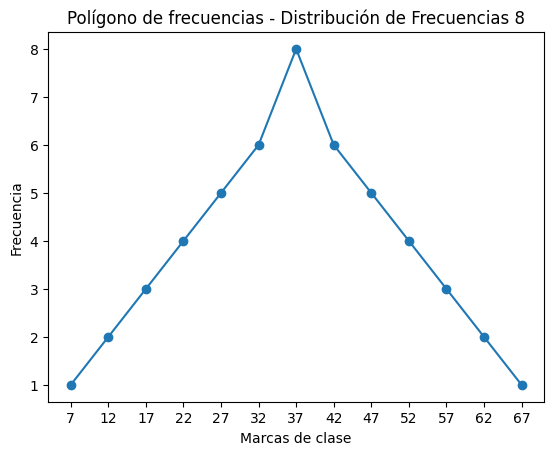

In [69]:
plt.plot(distribucion_frecuencia8["Puntos medios"], distribucion_frecuencia8["Frecuencias absolutas"],
         marker = "o")
plt.xticks(distribucion_frecuencia8["Puntos medios"])
plt.xlabel("Marcas de clase")
plt.ylabel("Frecuencia")
plt.title("Polígono de frecuencias - Distribución de Frecuencias 8")

plt.show()

## Ejercicio 26

Ahora traemos la distribución de frecuencias del ejercicio 9

In [70]:
distribucion_frecuencia9

,Límites aparentes,Límites verdaderos,Puntos medios / Marcas de clase,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[3, 7]","[2.5, 7.5]",5.0,1,1,0.02,0.02
1,"[8, 12]","[7.5, 12.5]",10.0,0,1,0.00,0.02
2,"[13, 17]","[12.5, 17.5]",15.0,5,6,0.10,0.12
3,"[18, 22]","[17.5, 22.5]",20.0,0,6,0.00,0.12
4,"[23, 27]","[22.5, 27.5]",25.0,9,15,0.18,0.30
5,"[28, 32]","[27.5, 32.5]",30.0,0,15,0.00,0.30
6,"[33, 37]","[32.5, 37.5]",35.0,14,29,0.28,0.58
7,"[38, 42]","[37.5, 42.5]",40.0,0,29,0.00,0.58
8,"[43, 47]","[42.5, 47.5]",45.0,11,40,0.22,0.80
9,"[48, 52]","[47.5, 52.5]",50.0,0,40,0.00,0.80


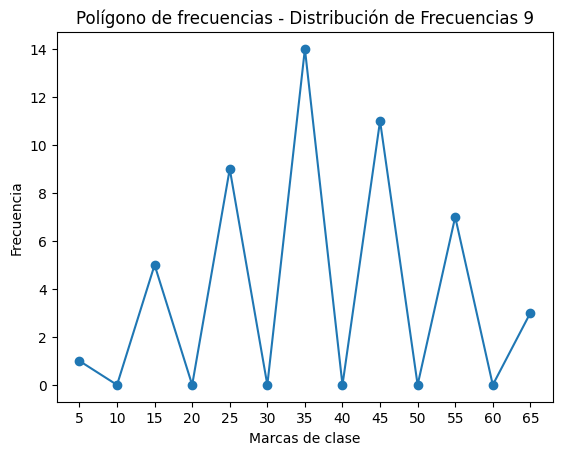

In [71]:
plt.plot(distribucion_frecuencia9["Puntos medios / Marcas de clase"], distribucion_frecuencia9["Frecuencia absoluta"],
         marker = "o")
plt.xticks(distribucion_frecuencia9["Puntos medios / Marcas de clase"])
plt.xlabel("Marcas de clase")
plt.ylabel("Frecuencia")
plt.title("Polígono de frecuencias - Distribución de Frecuencias 9")

plt.show()

Hay demasiados intervalos con cero frecuencia. El gráfico del ejercicio 25 y su distribución de frecuencia asociada son mejores.

## Ejercicio 27

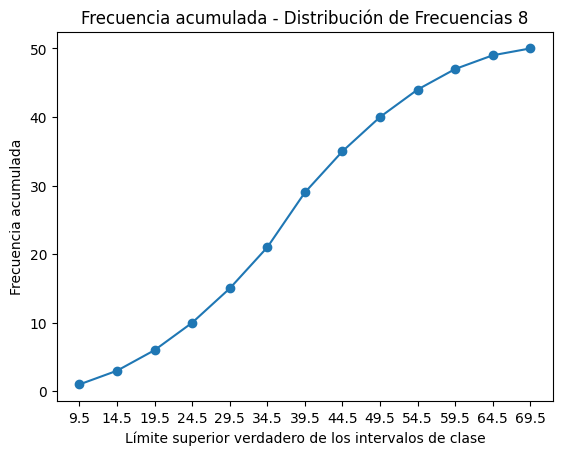

In [72]:
bins = [x[1] for x in distribucion_frecuencia8["Límites verdaderos"]]

plt.plot(bins, distribucion_frecuencia8["Frecuencias absolutas"].cumsum(),
         marker = 'o')

plt.xticks(bins)
plt.xlabel("Límite superior verdadero de los intervalos de clase")
plt.ylabel("Frecuencia acumulada")
plt.title("Frecuencia acumulada - Distribución de Frecuencias 8")

plt.show()

## Ejercicio 28

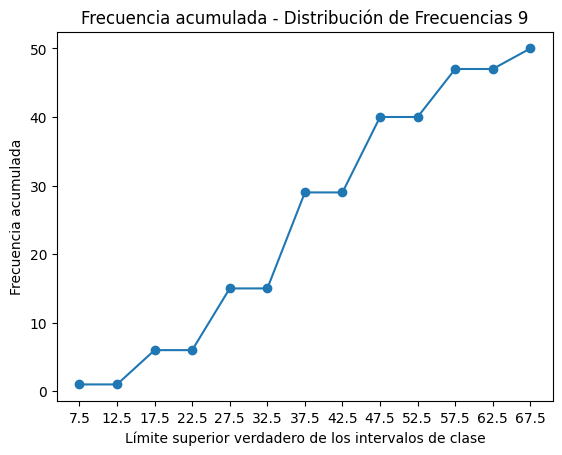

In [73]:
bins = [x[1] for x in distribucion_frecuencia9["Límites verdaderos"]]

plt.plot(bins, distribucion_frecuencia9["Frecuencia absoluta"].cumsum(),
         marker = 'o')

plt.xticks(bins)
plt.xlabel("Límite superior verdadero de los intervalos de clase")
plt.ylabel("Frecuencia acumulada")
plt.title("Frecuencia acumulada - Distribución de Frecuencias 9")

plt.show()

## Ejercicio 29

### Parte A

In [74]:
datos_ej29 = pd.DataFrame({'Año' : [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970],
                         'Nacimientos por 1000 hab.' : [32,30,28,21,19,24,24,18]})
datos_ej29

,Año,Nacimientos por 1000 hab.
0,1900,32
1,1910,30
2,1920,28
3,1930,21
4,1940,19
5,1950,24
6,1960,24
7,1970,18


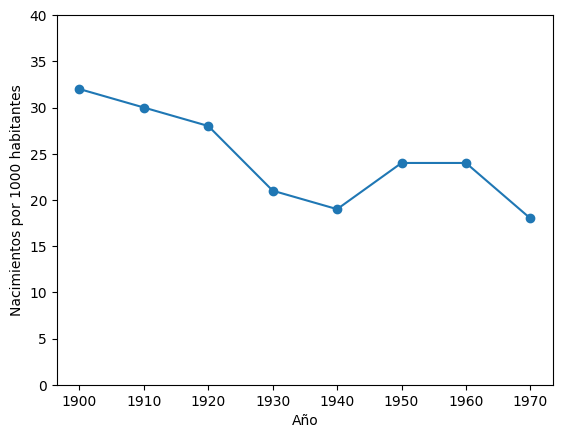

In [75]:
plt.plot(datos_ej29['Año'], datos_ej29['Nacimientos por 1000 hab.'], marker = 'o')
plt.xlabel("Año")
plt.ylabel("Nacimientos por 1000 habitantes")
plt.ylim(0, 40)

plt.show()

### Parte B

Parece existir una tendencia general decreciente.

## Ejercicio 30

In [76]:
datos_ej30 = [0,1,2,3,4,5,6,
              1,2,3,4,5,6,7,
              2,3,4,5,6,7,8,
              3,4,5,6,7,8,9,
              4,5,6,7,8,9,10,
              5,6,7,8,9,10,11,
              6,7,8,9,10,11,12]

distribucion_frecuencia30 =pd.DataFrame(
    {'Suma': pd.Series(datos_ej30).value_counts().sort_index().index,
    'Frecuencia' : (pd.Series(datos_ej30).value_counts().sort_index().values)})
distribucion_frecuencia30


,Suma,Frecuencia
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,7
7,7,6
8,8,5
9,9,4


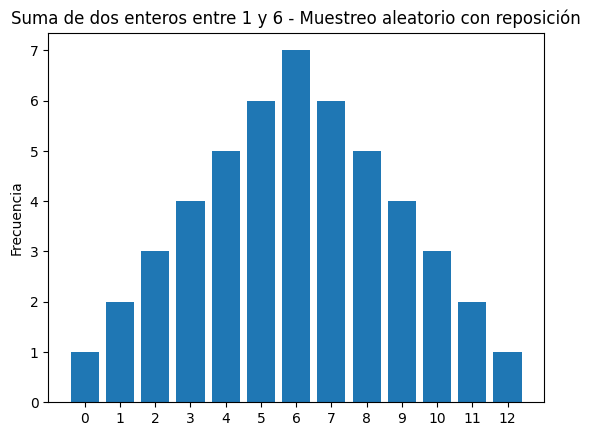

In [77]:
plt.bar(x = distribucion_frecuencia30['Suma'], height = distribucion_frecuencia30['Frecuencia'])
plt.xticks(distribucion_frecuencia30['Suma'])
plt.title('Suma de dos enteros entre 1 y 6 - Muestreo aleatorio con reposición')
plt.ylabel("Frecuencia")
plt.show()